# Análise do nível de felicidade mundial entre 2015 e 2019

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Tratamento de dados:

In [2]:
df_2015 = pd.read_csv(f'C:/Users/andre/Downloads/archive/2015.csv')
df_2016 = pd.read_csv(f'C:/Users/andre/Downloads/archive/2016.csv')
df_2017 = pd.read_csv(f'C:/Users/andre/Downloads/archive/2017.csv')
df_2018 = pd.read_csv(f'C:/Users/andre/Downloads/archive/2018.csv')
df_2019 = pd.read_csv(f'C:/Users/andre/Downloads/archive/2019.csv')

#drop de variáveis que não serão usadas
df_2015 = df_2015.drop(['Standard Error', 'Dystopia Residual'], axis=1)
df_2016 = df_2016.drop(['Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], axis=1)
df_2017 = df_2017.drop(['Whisker.high', 'Whisker.low', 'Dystopia.Residual'],axis=1)
df_2018 = df_2018.drop(['Social support'],axis=1)
df_2019 = df_2019.drop(['Social support'],axis=1)

#Rename no df de 2017
column_mapping = {
    'Country': 'Country',
    'Happiness.Rank': 'Happiness Rank',
    'Happiness.Score': 'Happiness Score',
    'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
    'Family': 'Family',
    'Health..Life.Expectancy.': 'Health (Life Expectancy)',
    'Freedom': 'Freedom',
    'Generosity': 'Generosity',
    'Trust..Government.Corruption.': 'Trust (Government Corruption)'
}
column_mapping2 = {
    'Country or region':'Country', 
    'Healthy life expectancy':'Health (Life Expectancy)',
    'GDP per capita':'Economy (GDP per Capita)',
    'Freedom to make life choices':'Freedom',
    'Perceptions of corruption':'Trust (Government Corruption)',
    'Score':'Happiness Score'
}
df_2017 = df_2017.rename(columns=column_mapping)
df_2018 = df_2018.rename(columns=column_mapping2)
df_2019 = df_2019.rename(columns=column_mapping2)

# Exploração inicial

Criar boxplots e calcular medidas de centralidade e dispersão das variáveis

In [3]:
dataframes = [df_2015, df_2016, df_2017, df_2018, df_2019]
years = [2015, 2016, 2017, 2018, 2019]

In [4]:
for i, df in enumerate(dataframes):
    print(f"DataFrame {i+1}:")
    
    # Filtrar colunas numéricas
    numeric_columns = df.select_dtypes(include=['float64', 'int64'])
    
    if len(numeric_columns) == 0:
        print("Não há colunas numéricas neste DataFrame.")
        continue
    
    # Calcular medidas de centralidade
    print("Medidas de Centralidade:")
    print(numeric_columns.describe())
    print(" ")
    # Calcular medidas de dispersão
    print("Medidas de Dispersão:")
    print(numeric_columns.var())
    print(" ")

DataFrame 1:
Medidas de Centralidade:
       Happiness Rank  Happiness Score  Economy (GDP per Capita)      Family  \
count      158.000000       158.000000                158.000000  158.000000   
mean        79.493671         5.375734                  0.846137    0.991046   
std         45.754363         1.145010                  0.403121    0.272369   
min          1.000000         2.839000                  0.000000    0.000000   
25%         40.250000         4.526000                  0.545808    0.856823   
50%         79.500000         5.232500                  0.910245    1.029510   
75%        118.750000         6.243750                  1.158448    1.214405   
max        158.000000         7.587000                  1.690420    1.402230   

       Health (Life Expectancy)     Freedom  Trust (Government Corruption)  \
count                158.000000  158.000000                     158.000000   
mean                   0.630259    0.428615                       0.143422   
std    

DataFrame 2015:


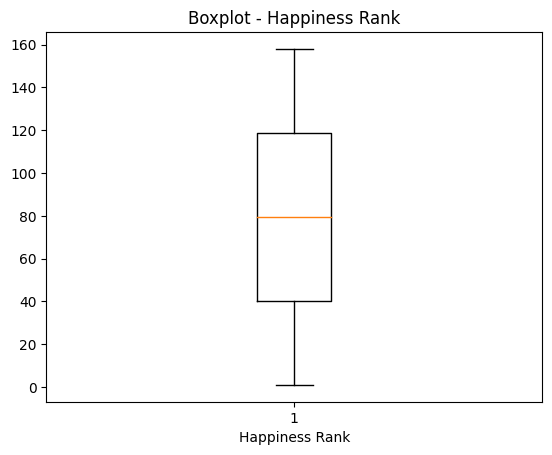

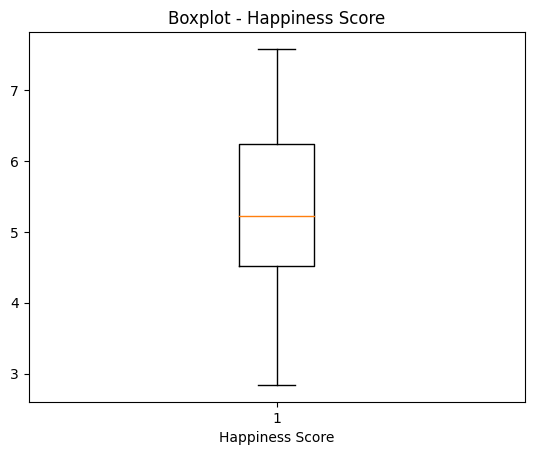

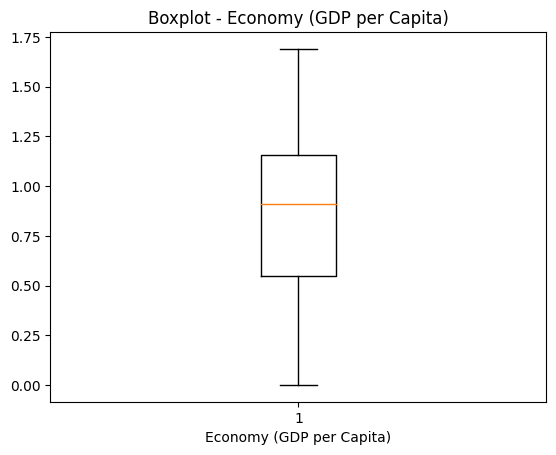

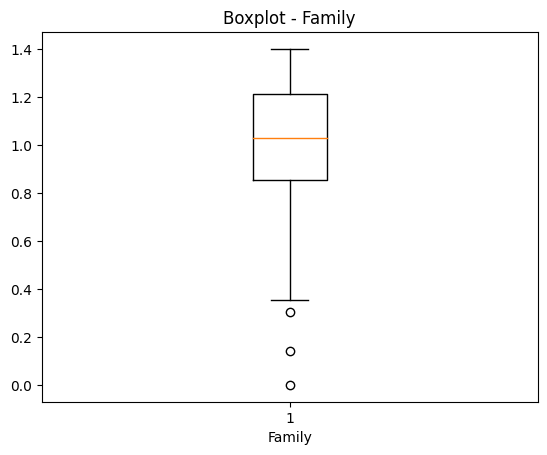

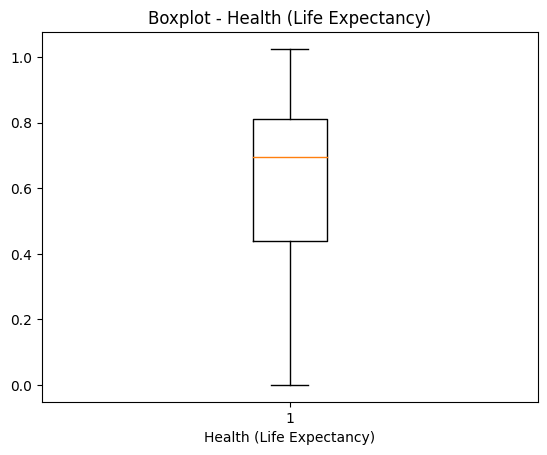

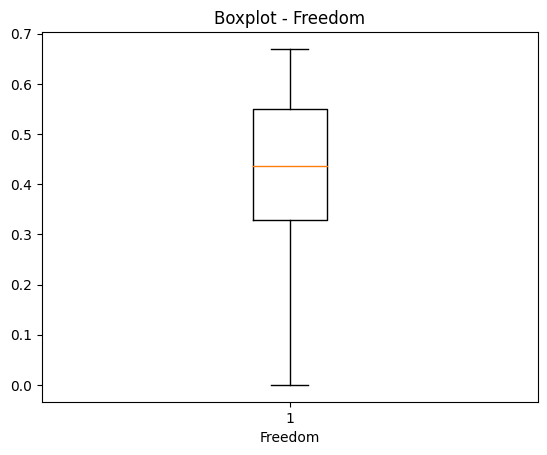

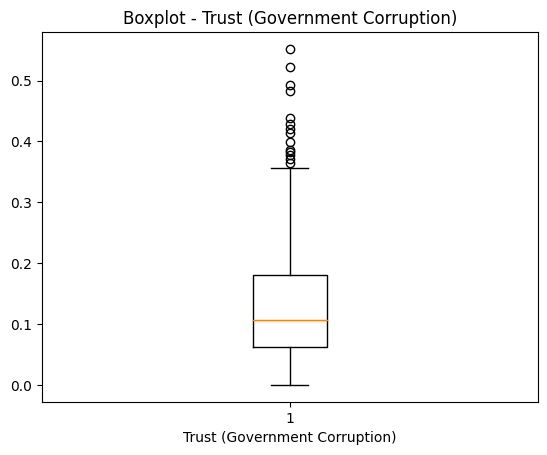

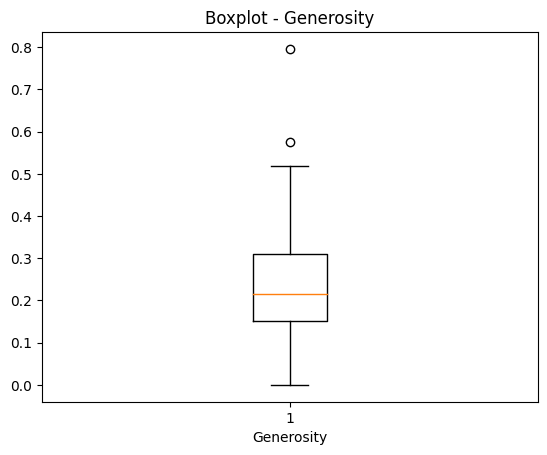

DataFrame 2016:


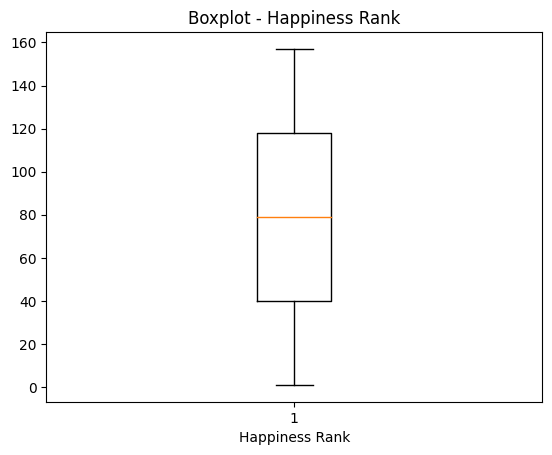

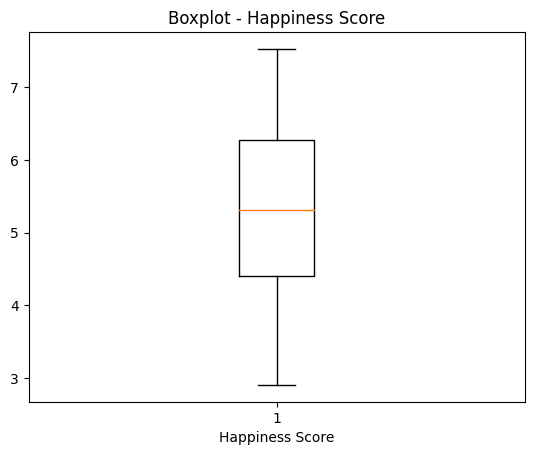

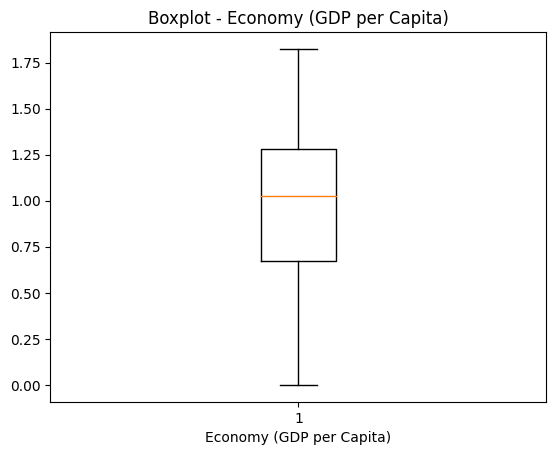

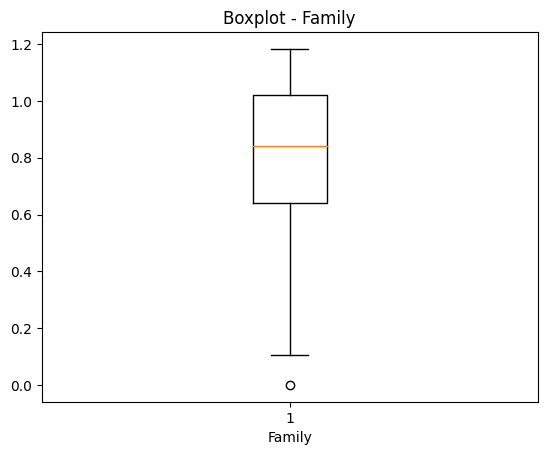

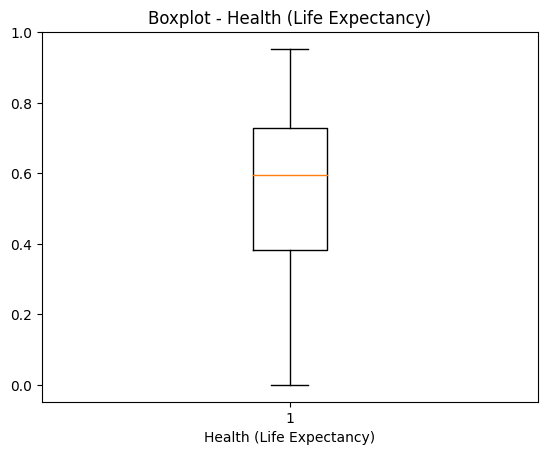

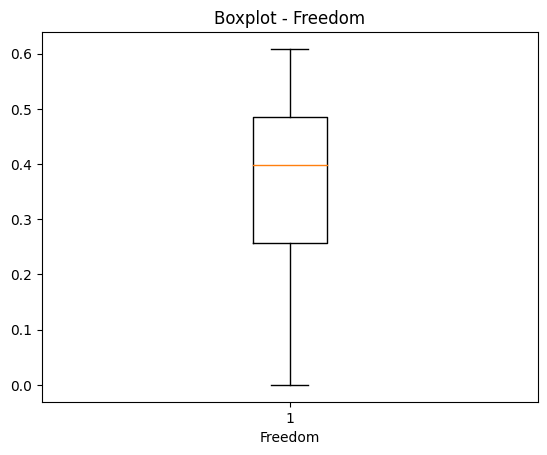

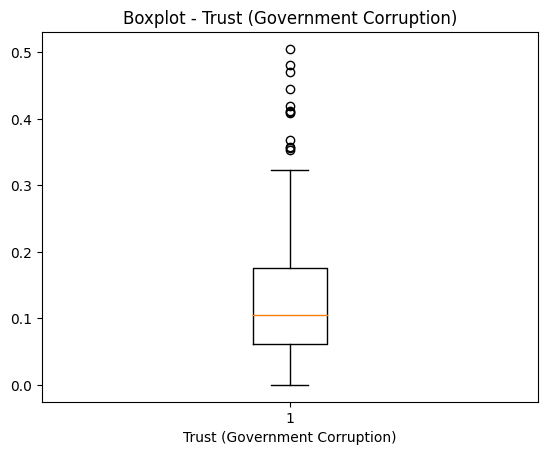

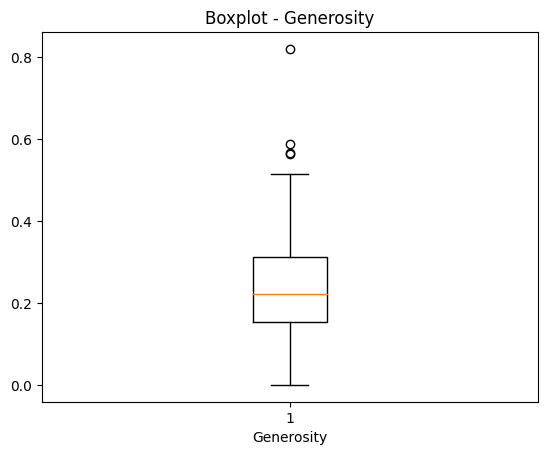

DataFrame 2017:


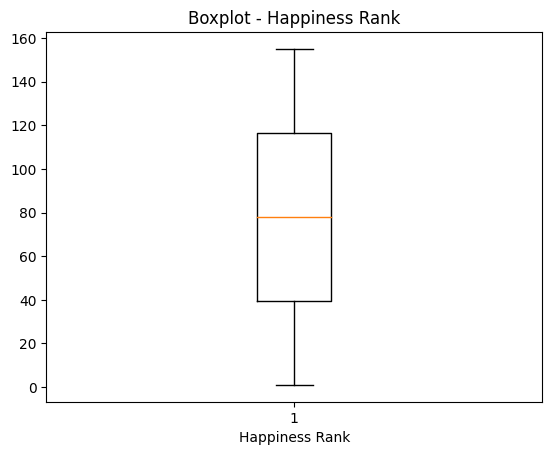

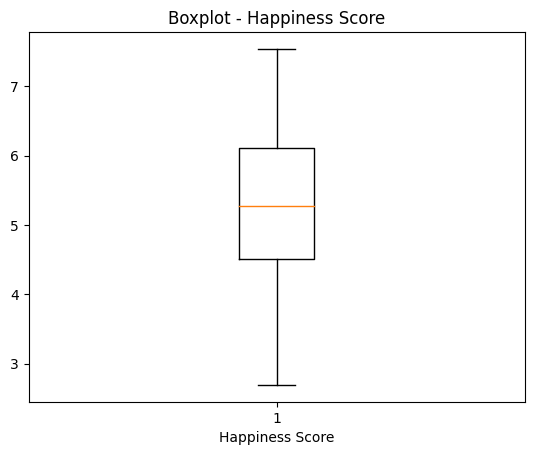

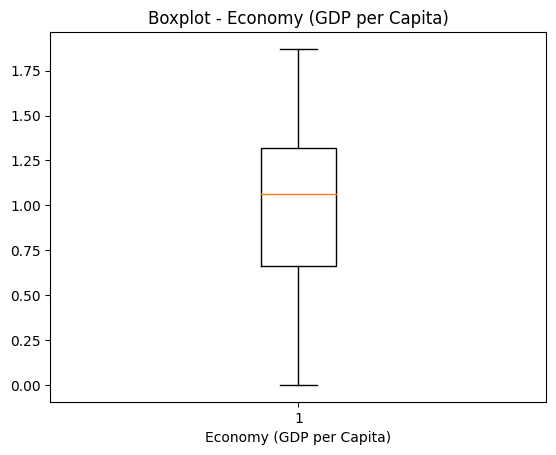

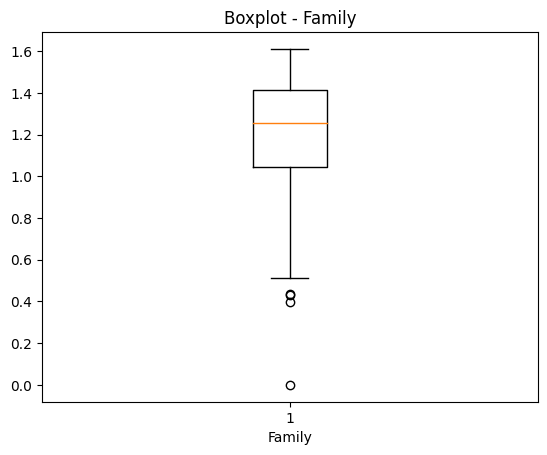

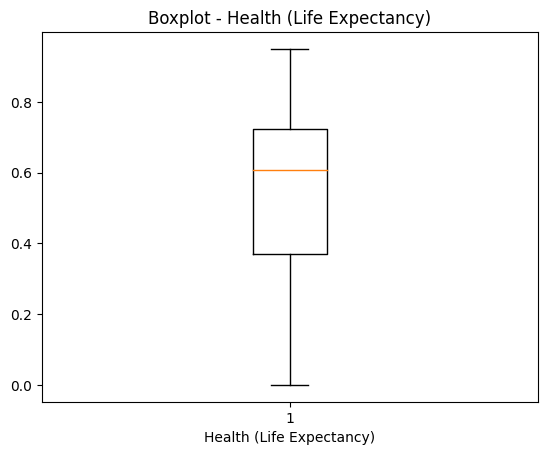

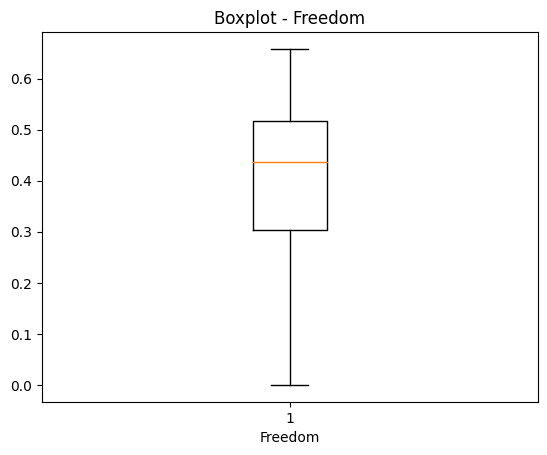

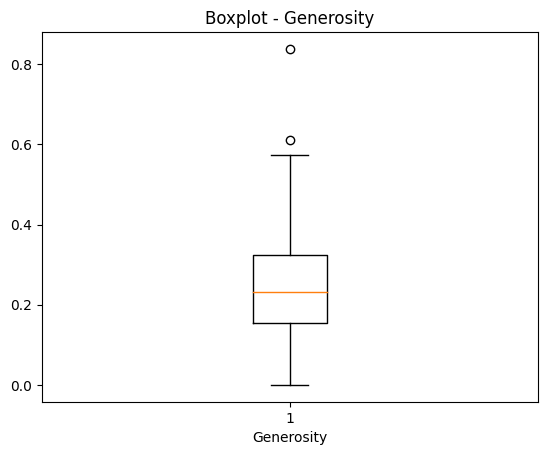

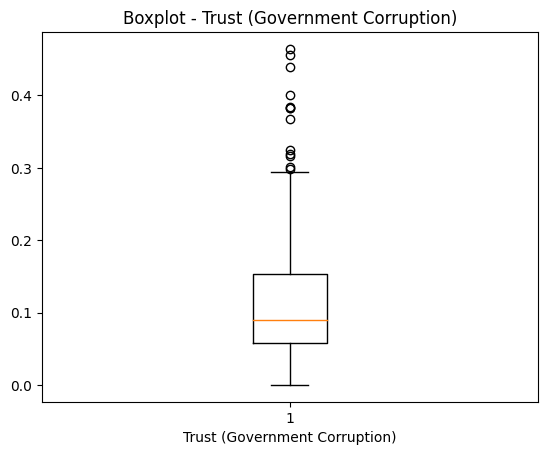

DataFrame 2018:


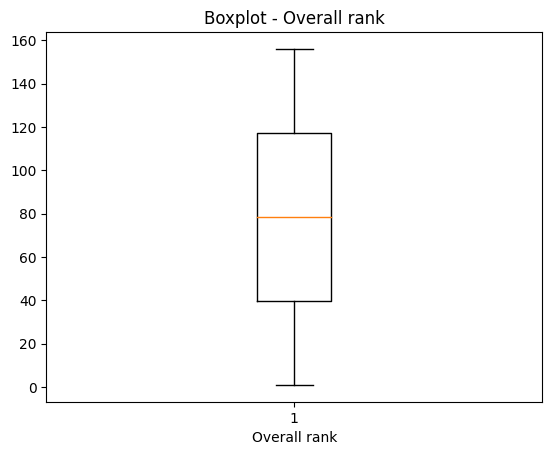

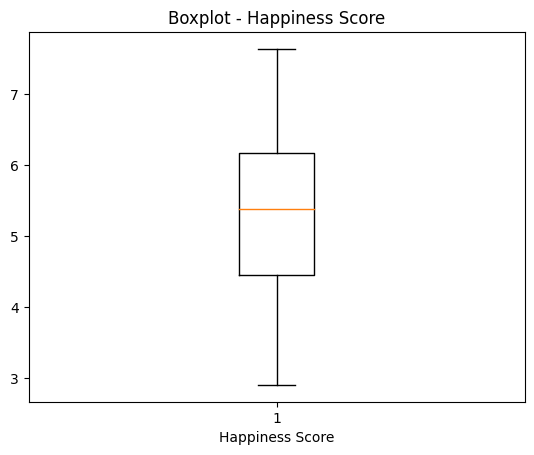

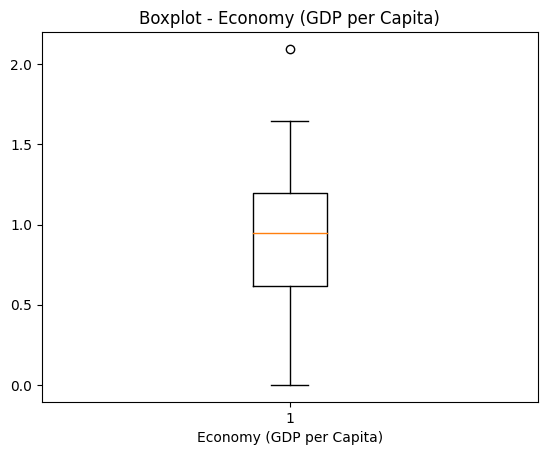

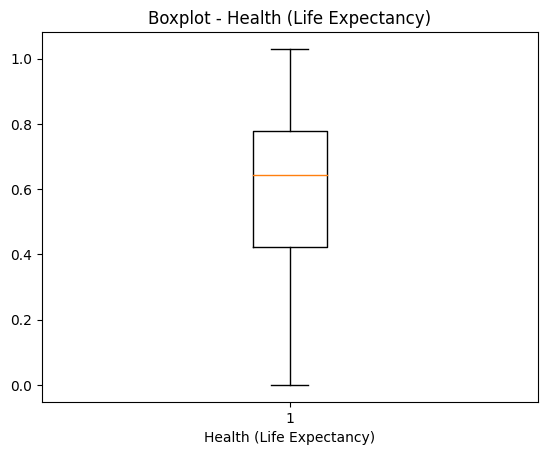

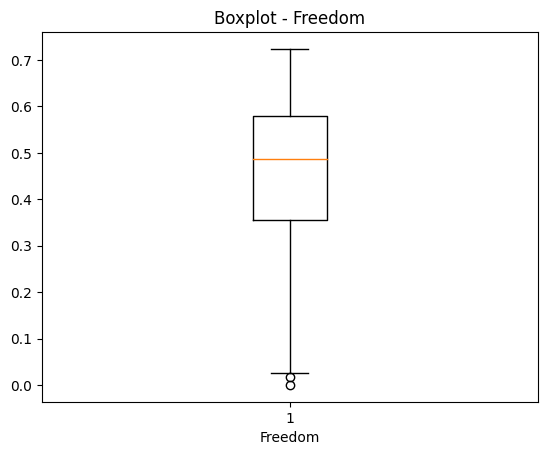

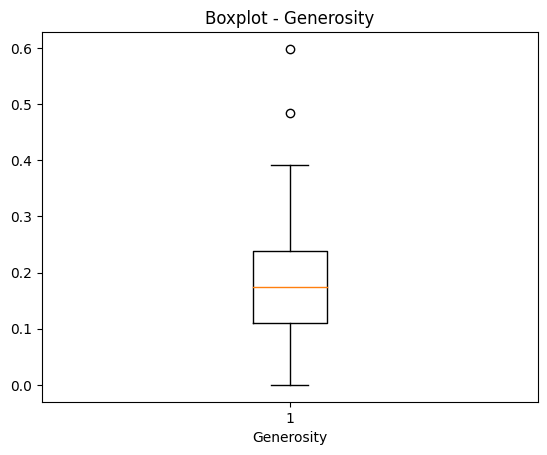

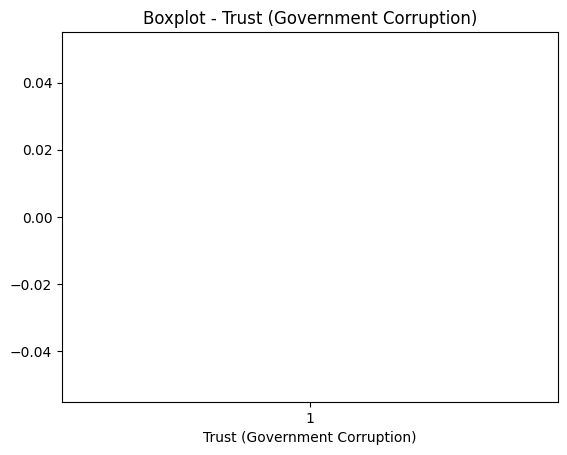

DataFrame 2019:


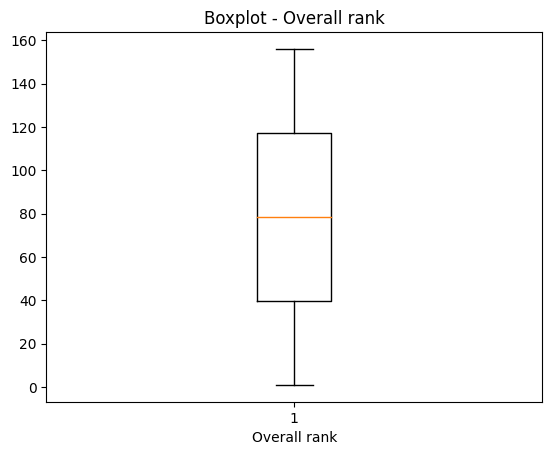

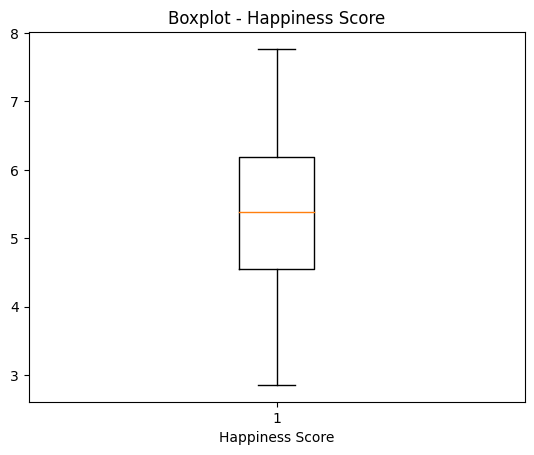

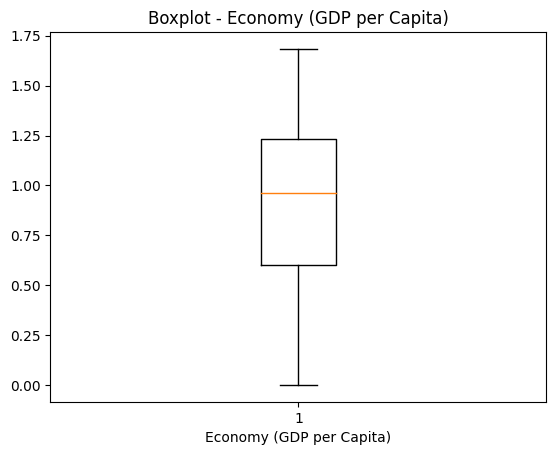

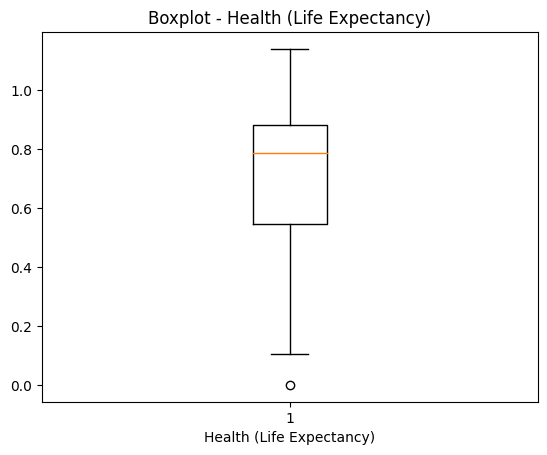

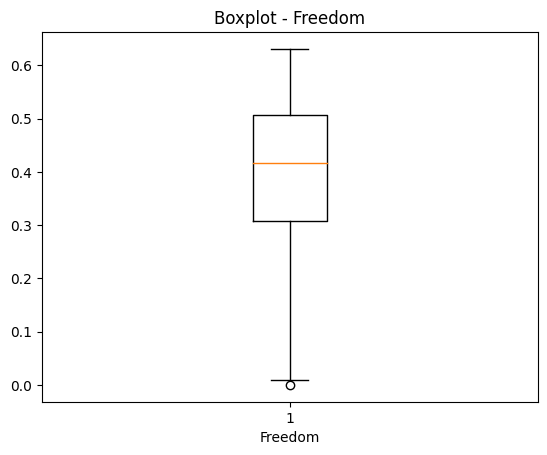

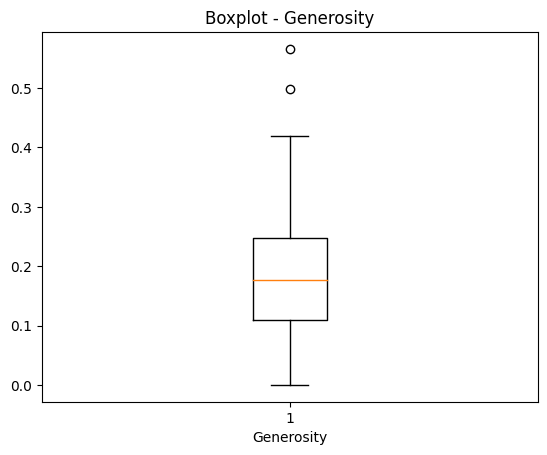

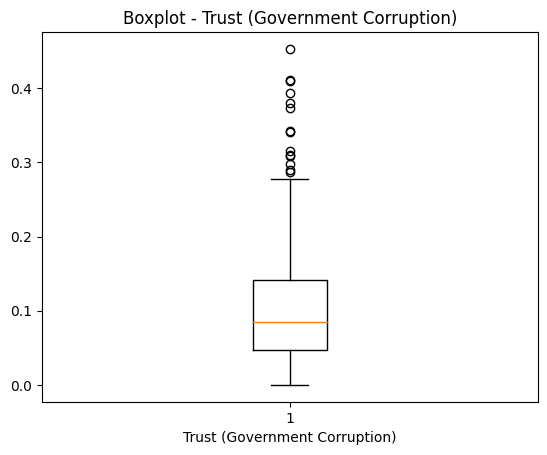

In [5]:
# Criar boxplots para cada DataFrame
for i, df in enumerate(dataframes):
    print(f"DataFrame {years[i]}:")
    
    # Filtrar apenas as colunas numéricas
    numeric_columns = df.select_dtypes(include=['float64', 'int64'])
    
    # Criar boxplots para cada coluna numérica
    for column in numeric_columns:
        plt.figure()
        plt.boxplot(df[column])
        plt.title(f"Boxplot - {column}")
        plt.xlabel(column)
        plt.show()

# Visualização de dados:
* Gráfico de dispersão para analisar correlação e tendências de duas variáveis
* Histograma para entender frequências dos dados
* Gráfico de barra ou linha de acordo com o tipo de dado trabalhado

Neste primeiro momento, analisei a variável 'Happiness Score' com 'Health (Life Expectancy)' que é a 
nota que o país tem em relação a felicidade e a nota que seu povo dá a expectativa de vida.

Ano 2015:


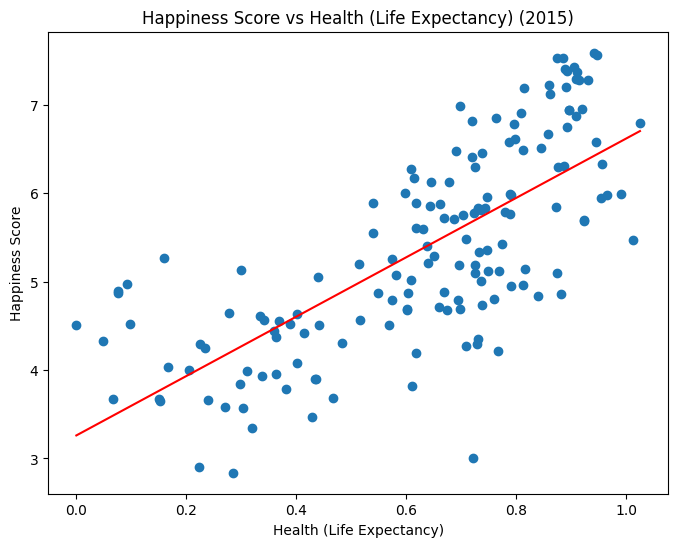

Ano 2016:


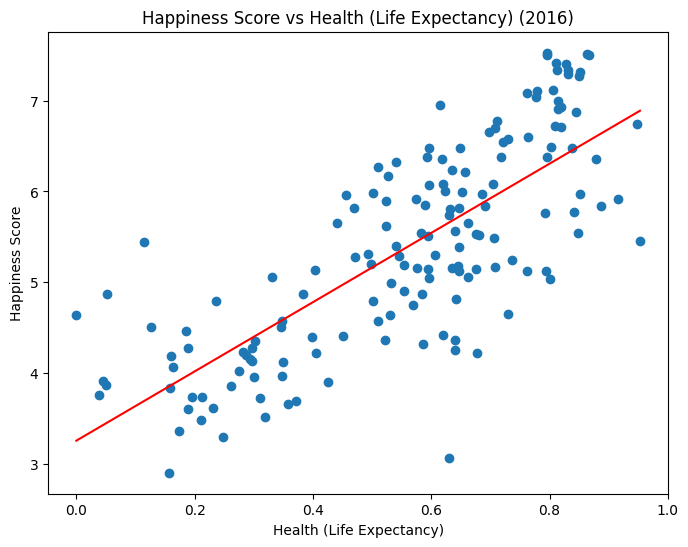

Ano 2017:


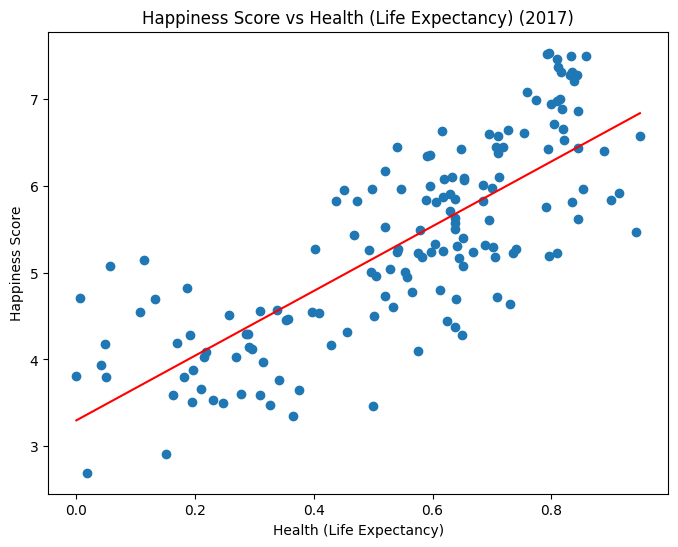

Ano 2018:


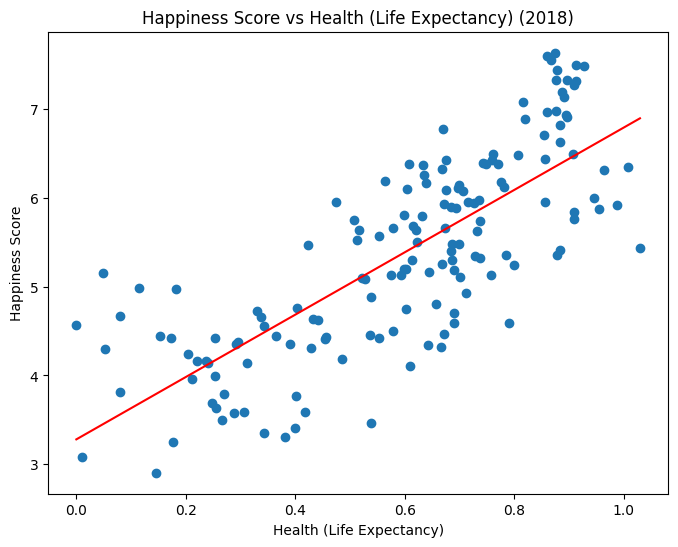

Ano 2019:


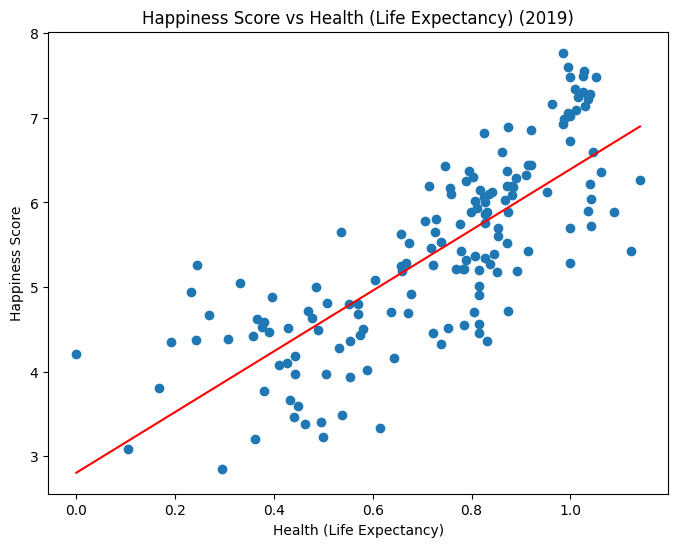

In [6]:
for i, df in enumerate(dataframes):
    print(f"Ano {years[i]}:")
    
    x = df["Health (Life Expectancy)"]
    y = df["Happiness Score"]

    coefficients = np.polyfit(x, y, 1)
    poly = np.poly1d(coefficients)
    trendline = np.linspace(x.min(), x.max(), len(x))

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y)
    plt.plot(trendline, poly(trendline), color='r')
    plt.title(f"Happiness Score vs Health (Life Expectancy) ({years[i]})")
    plt.xlabel("Health (Life Expectancy)")
    plt.ylabel("Happiness Score")
    plt.show()

## Histogramas

DataFrame 2015:


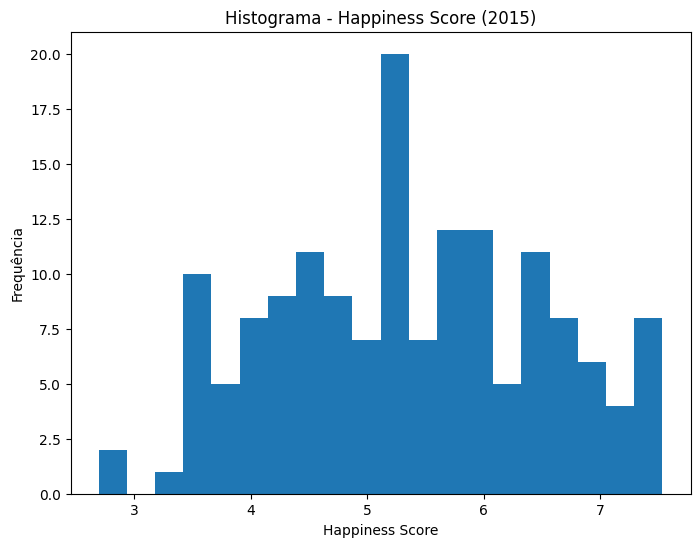

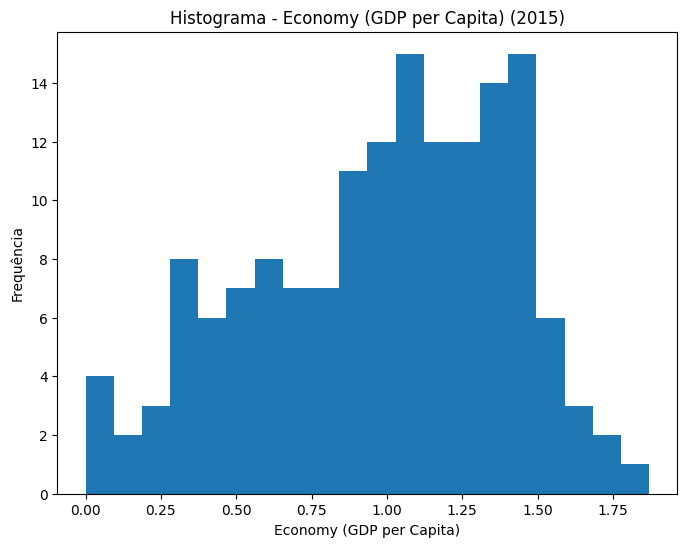

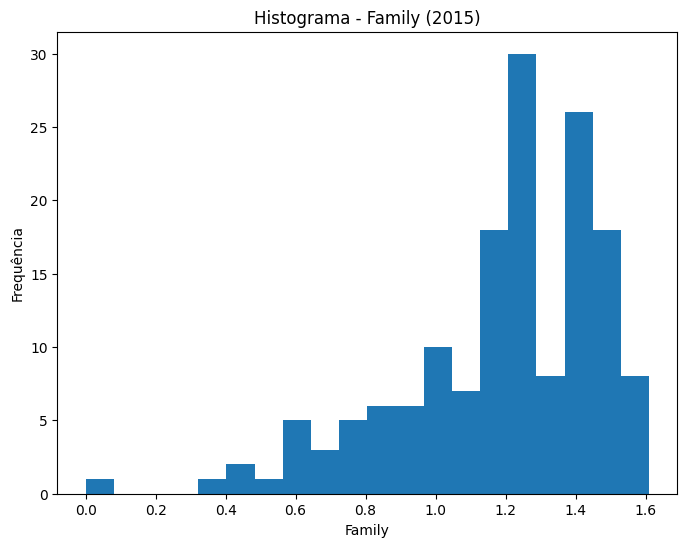

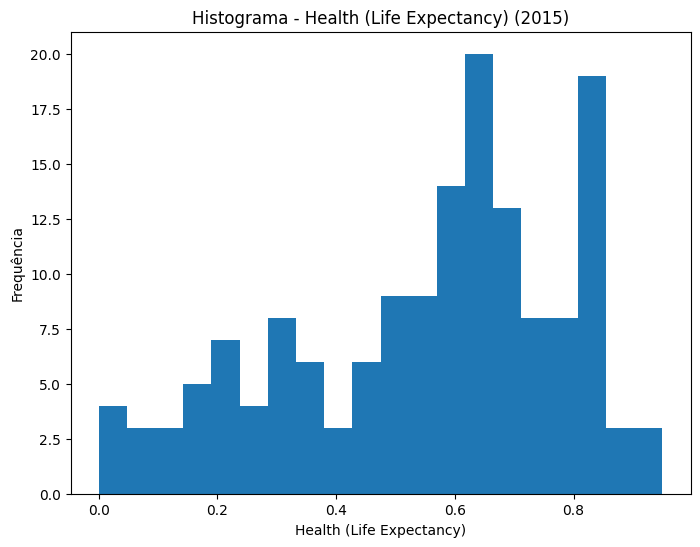

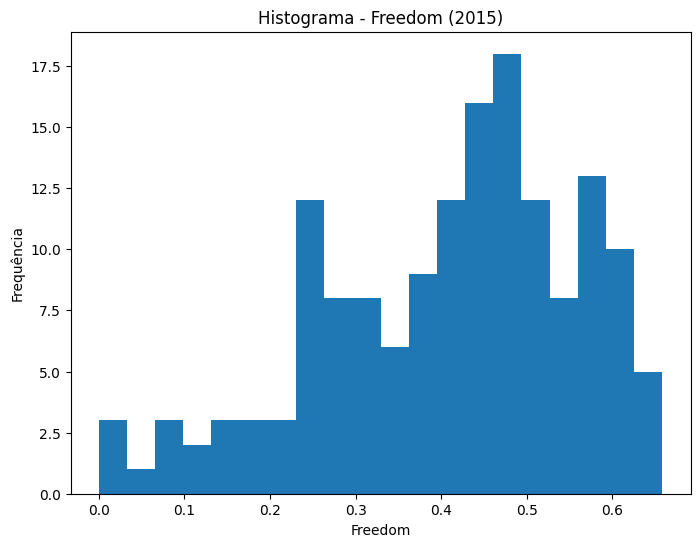

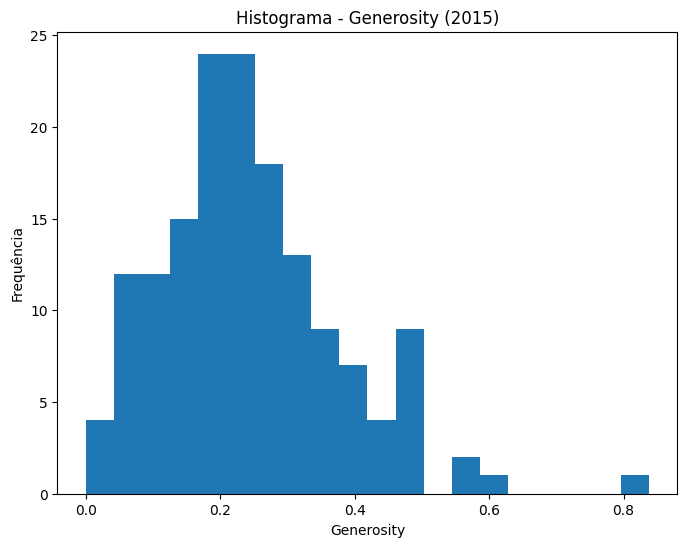

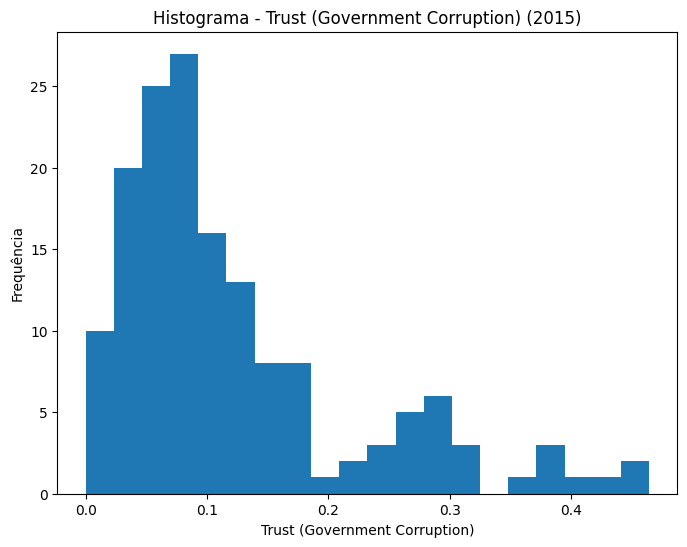



DataFrame 2016:


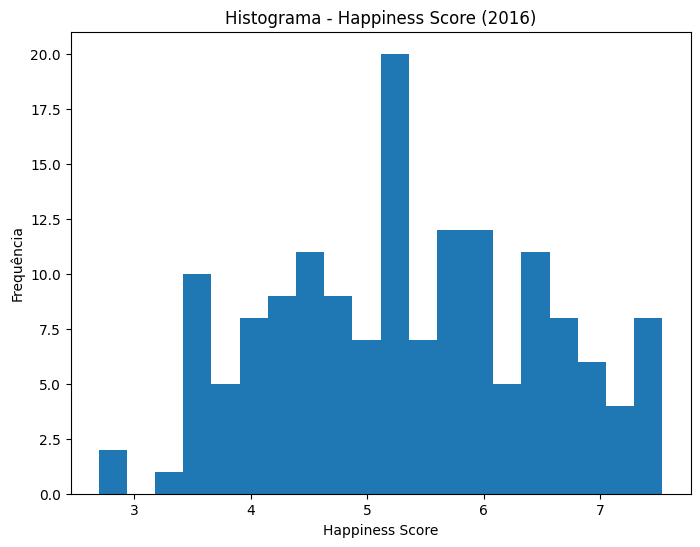

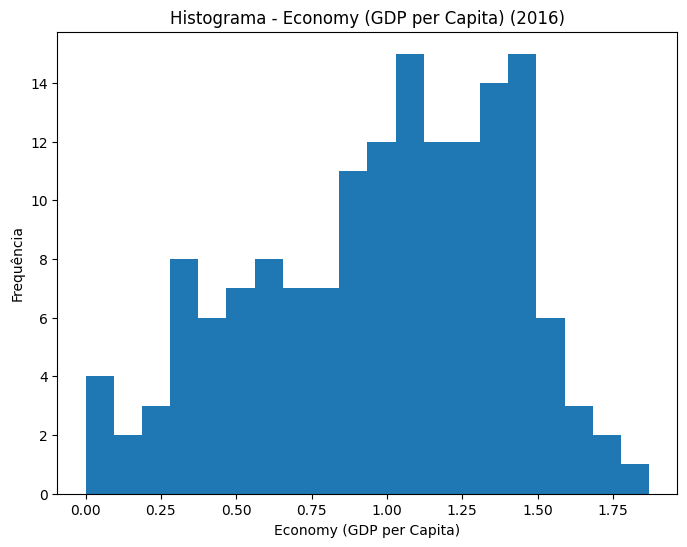

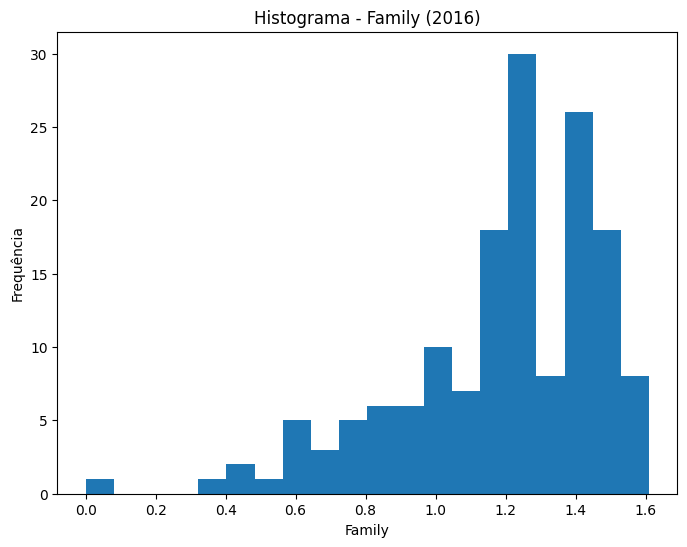

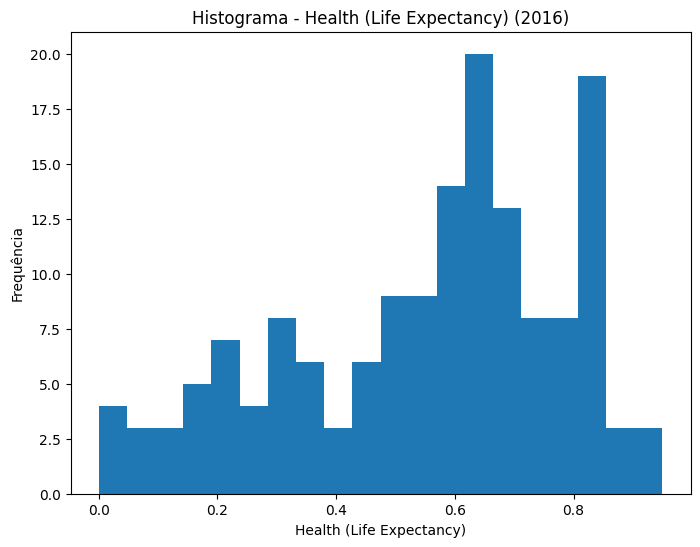

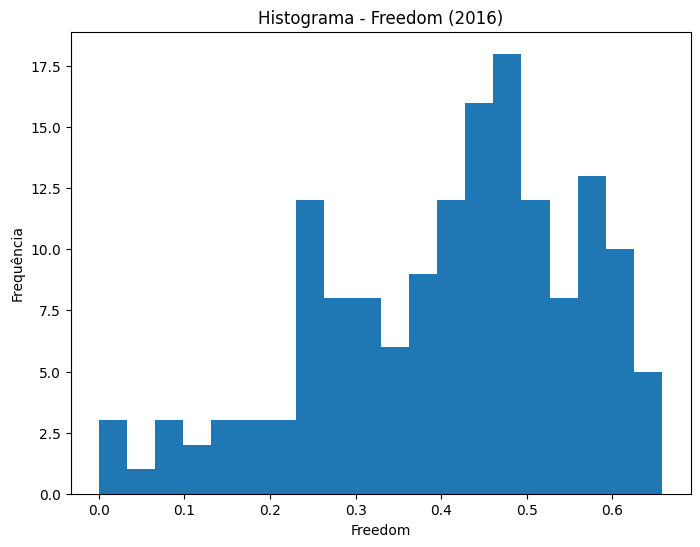

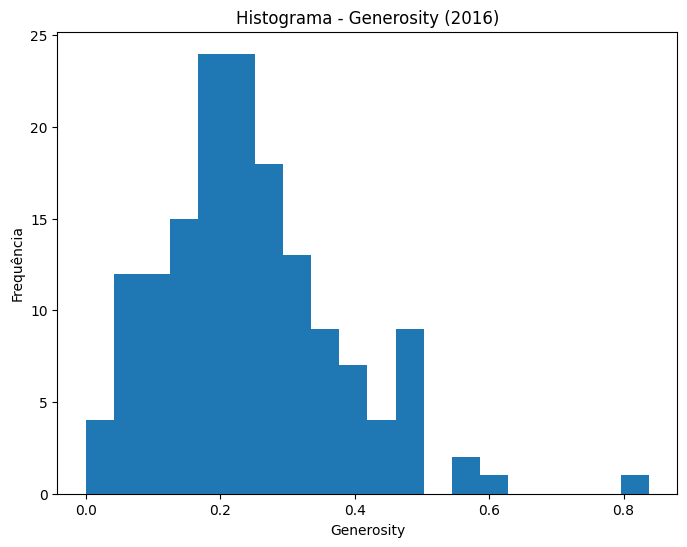

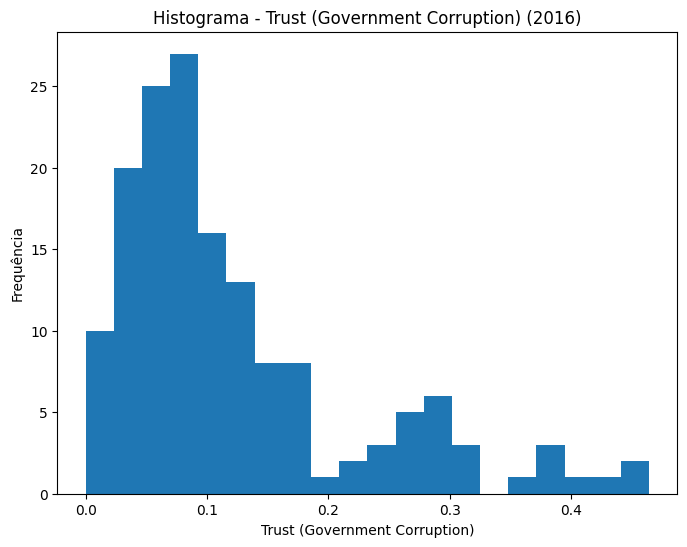



DataFrame 2017:


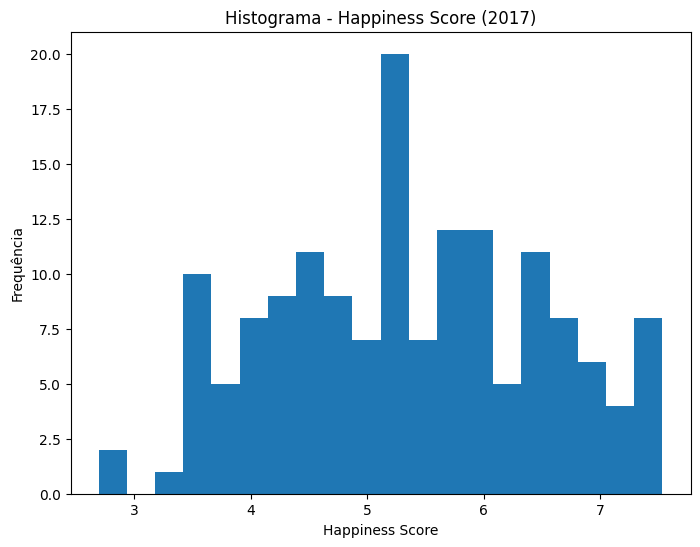

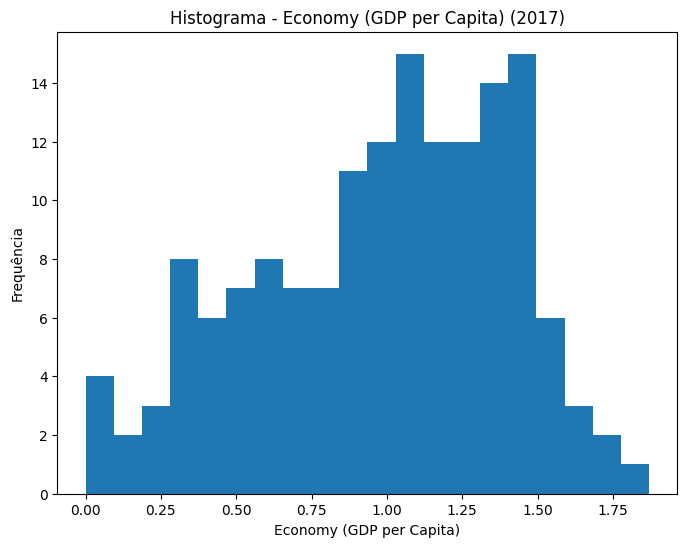

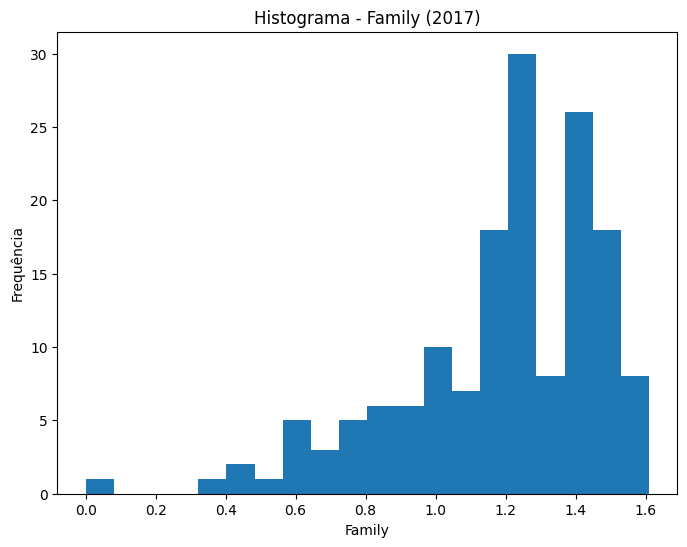

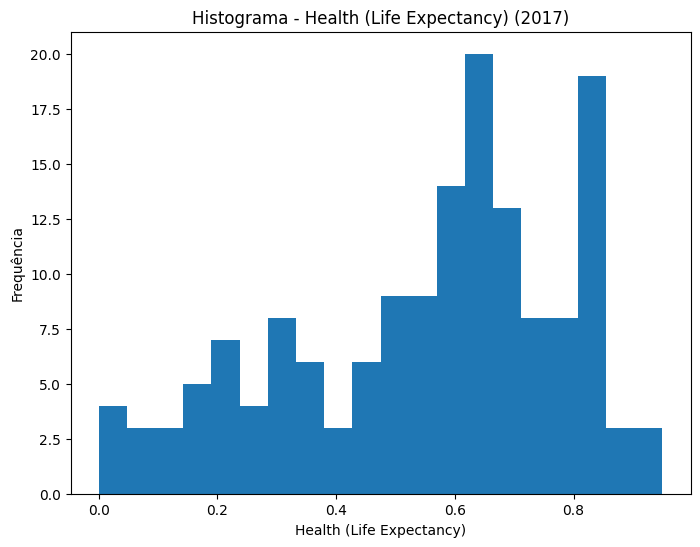

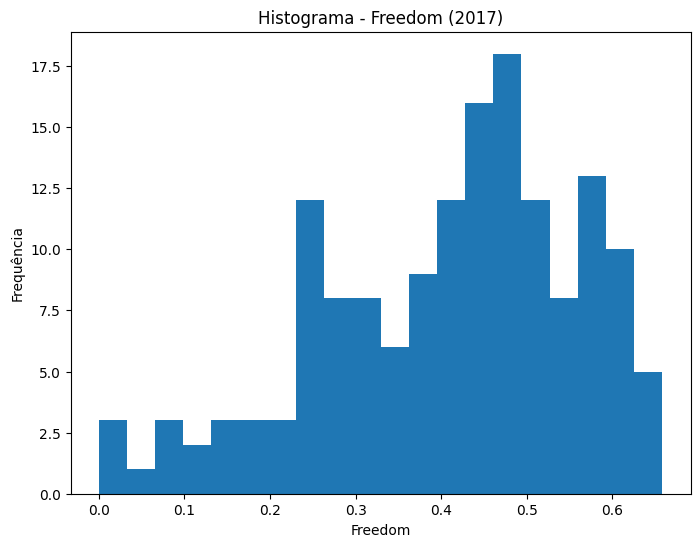

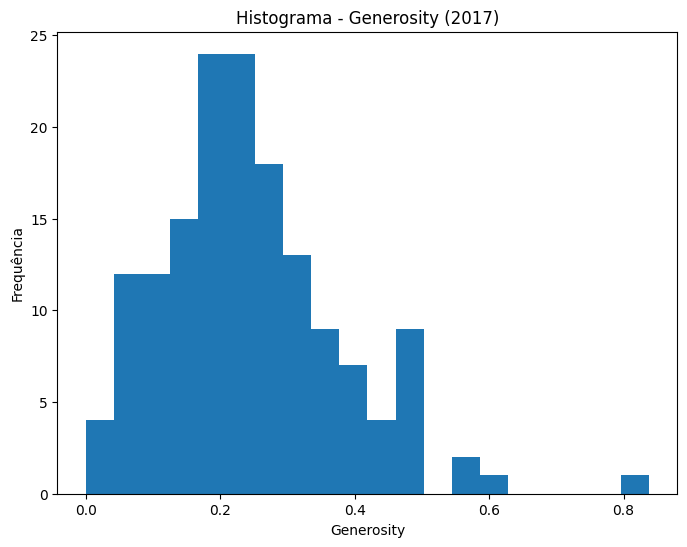

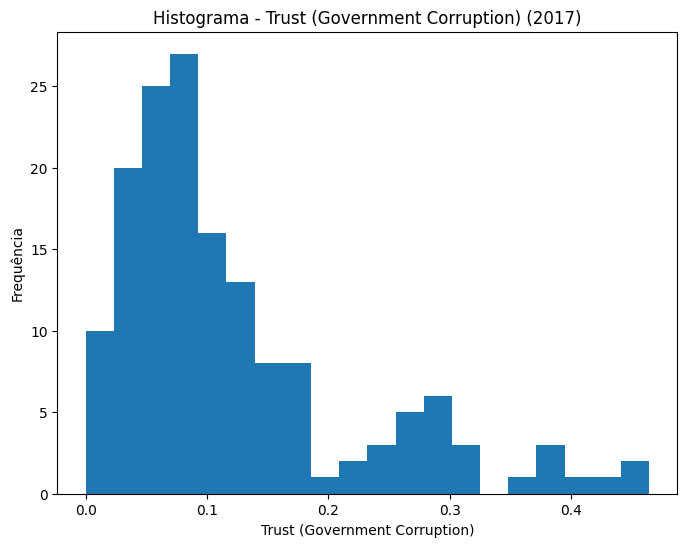



DataFrame 2018:


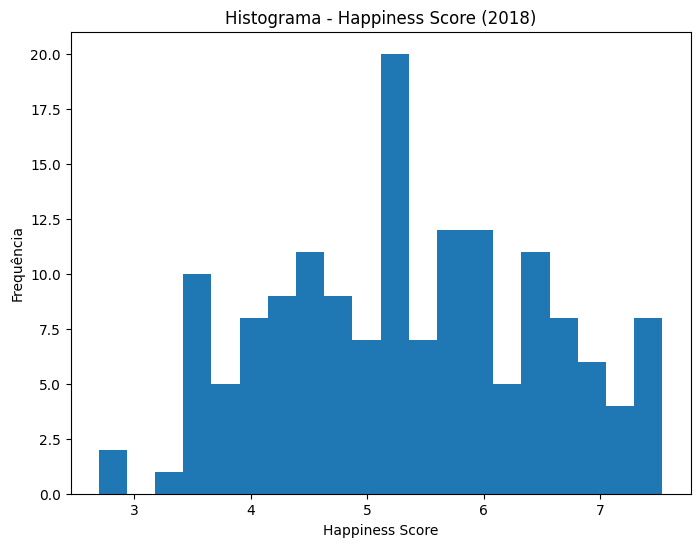

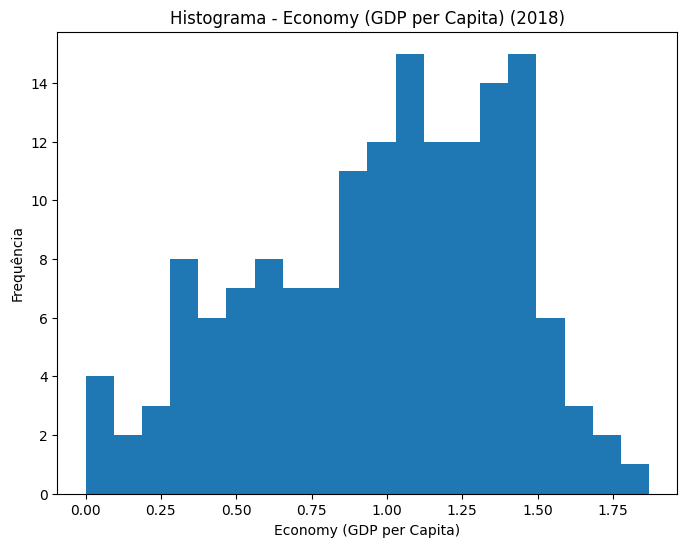

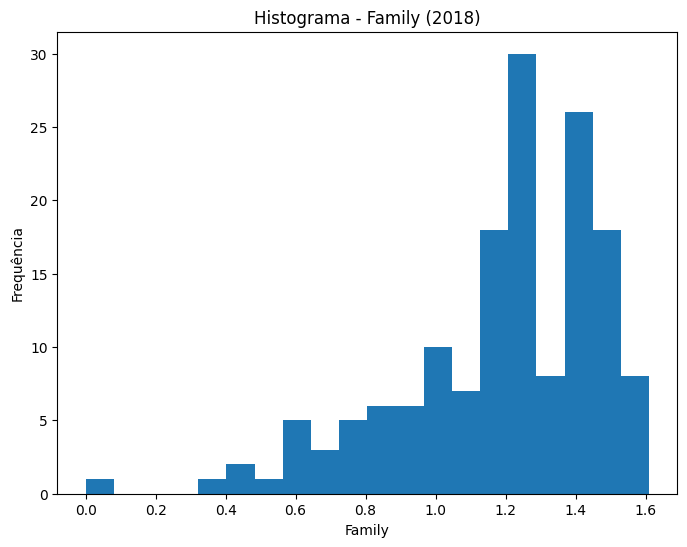

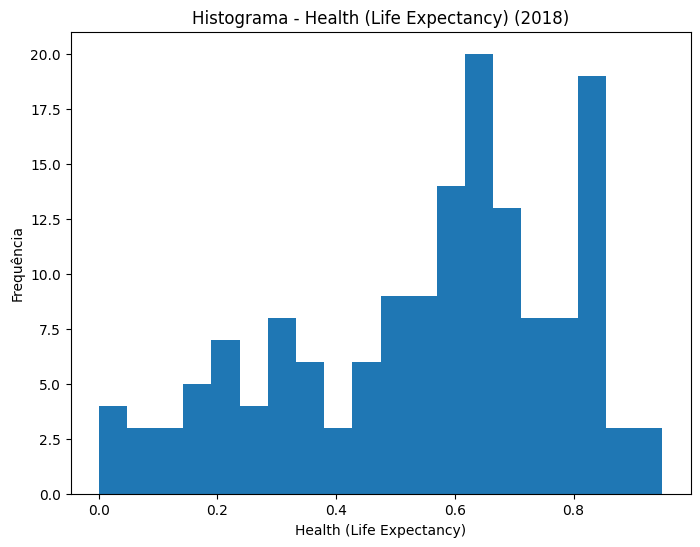

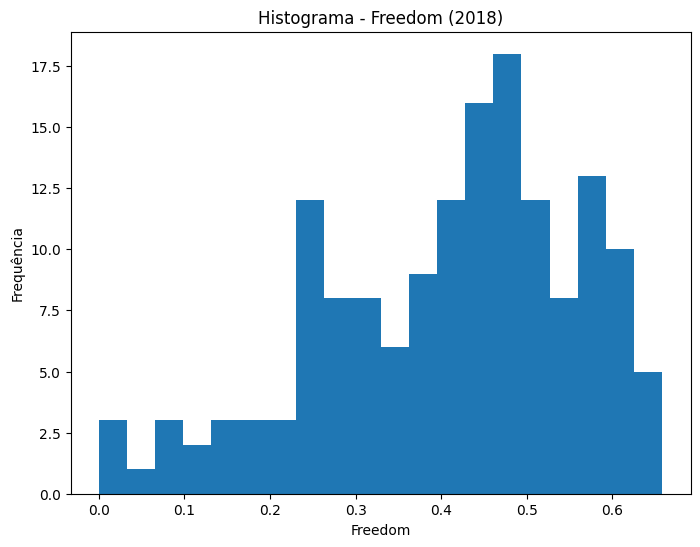

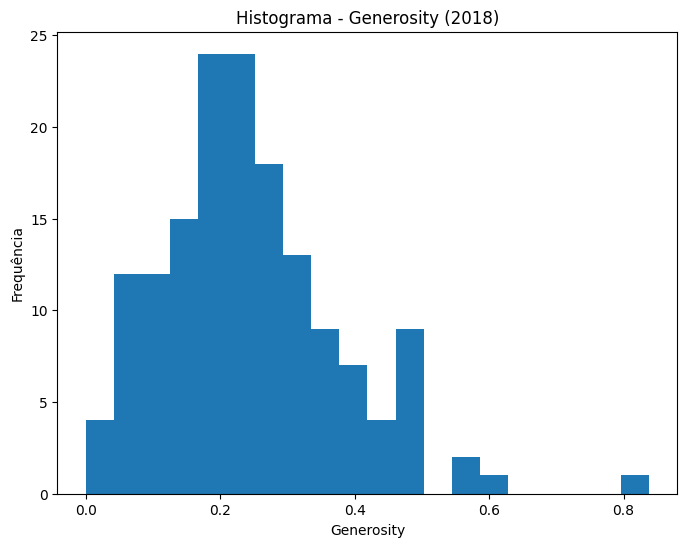

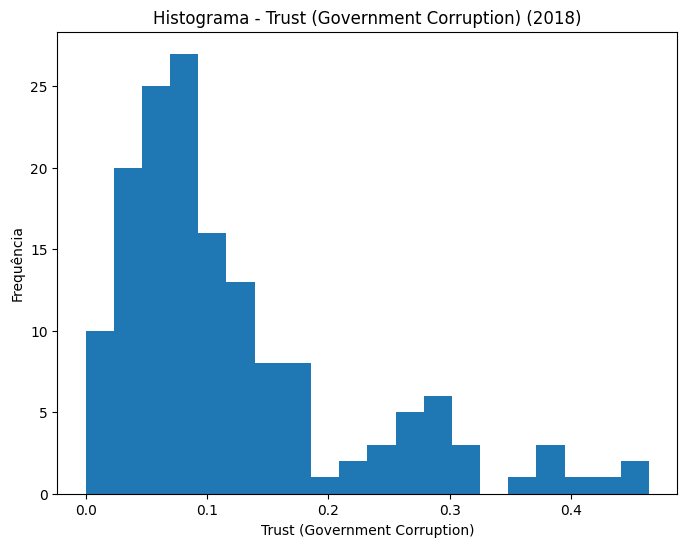



DataFrame 2019:


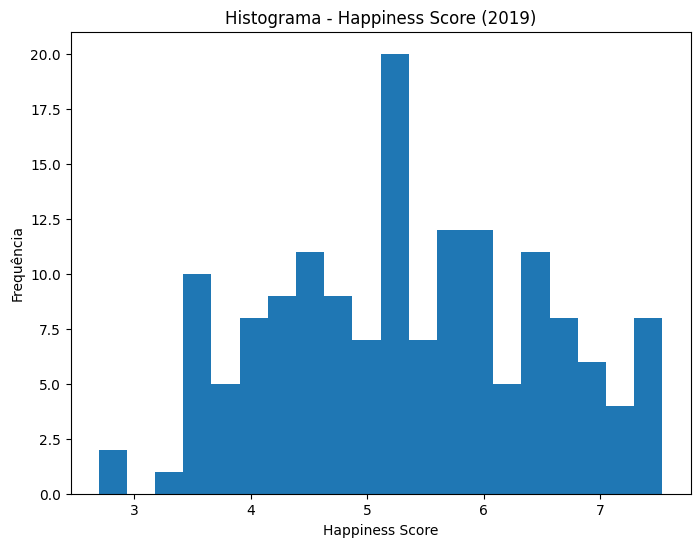

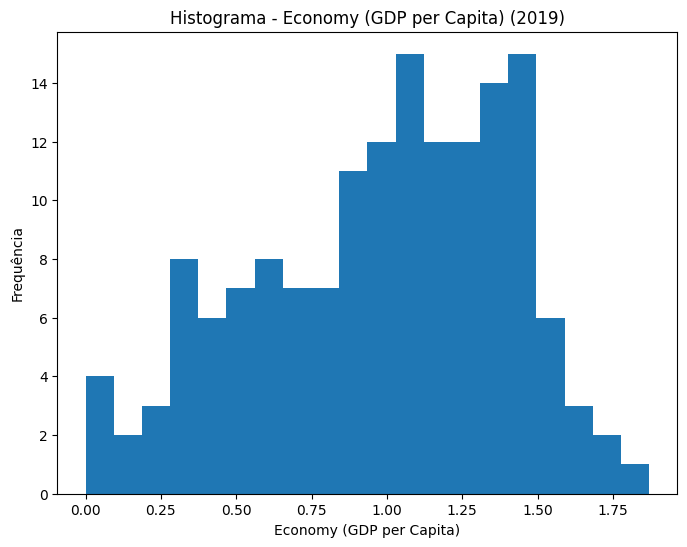

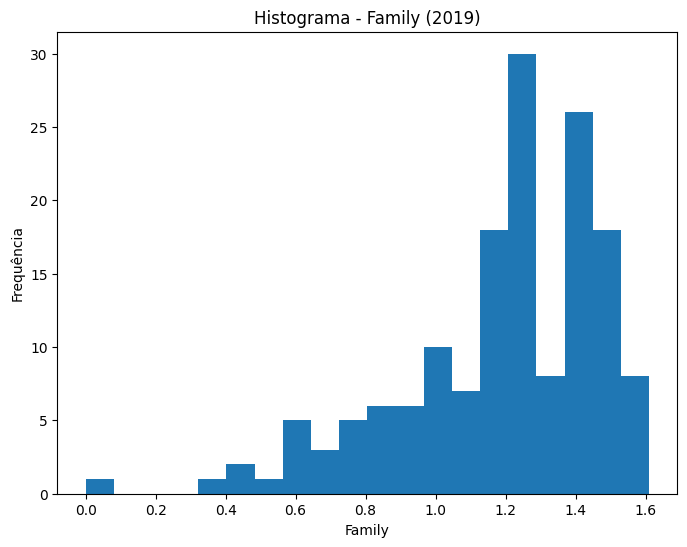

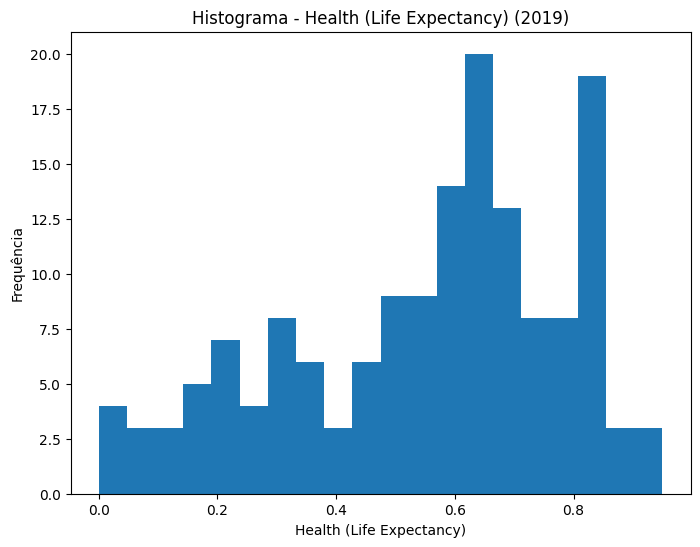

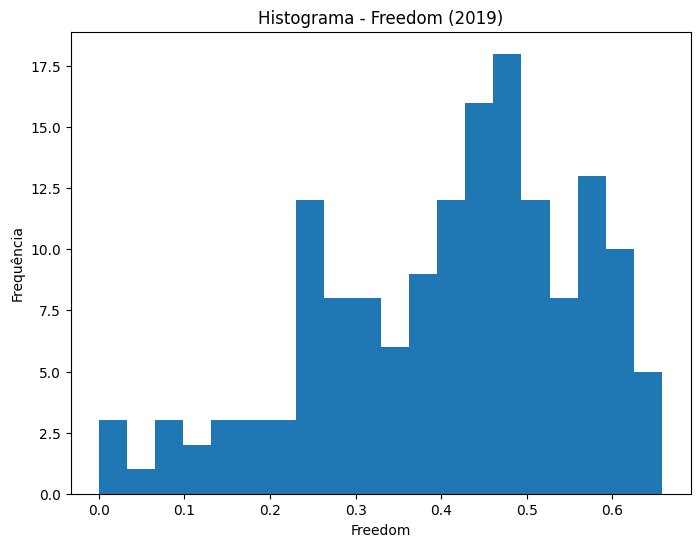

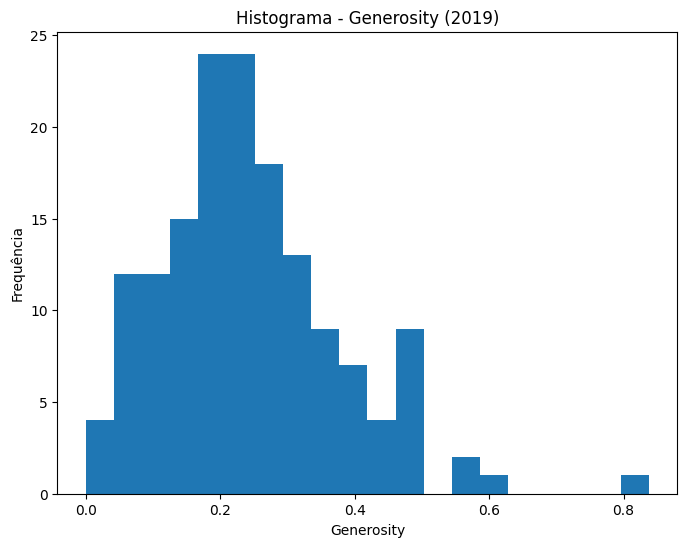

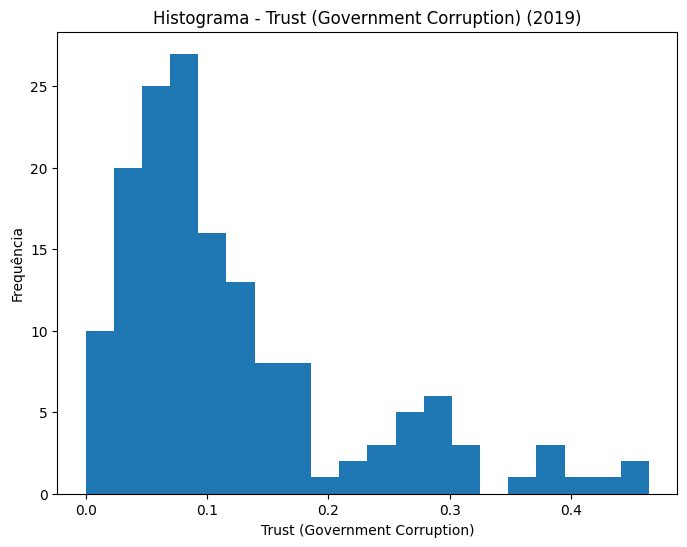

In [191]:
for i, df in enumerate(dataframes):
    print(f"DataFrame {years[i]}:")

    for column in df_numeric.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df_numeric[column], bins=20)
        plt.title(f"Histograma - {column} ({years[i]})")
        plt.xlabel(column)
        plt.ylabel("Frequência")
        plt.show()

    print("\n")

# Gráficos de linha

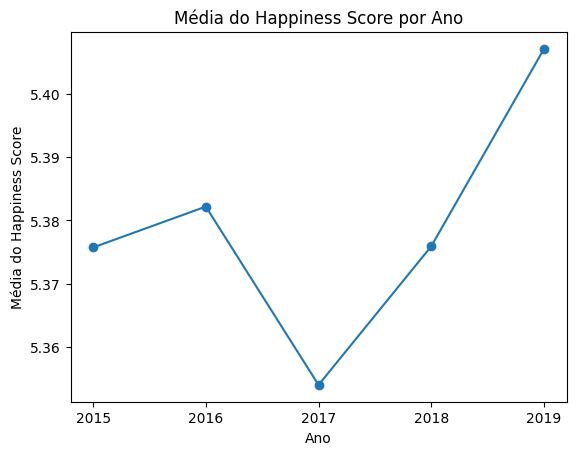

In [209]:
means = []

for df in dataframes:
    mean_score = df['Happiness Score'].mean()
    means.append(mean_score)

plt.plot(years, means, marker='o')
plt.title('Média do Happiness Score por Ano')
plt.xlabel('Ano')
plt.ylabel('Média do Happiness Score')
plt.xticks(years)
plt.show()

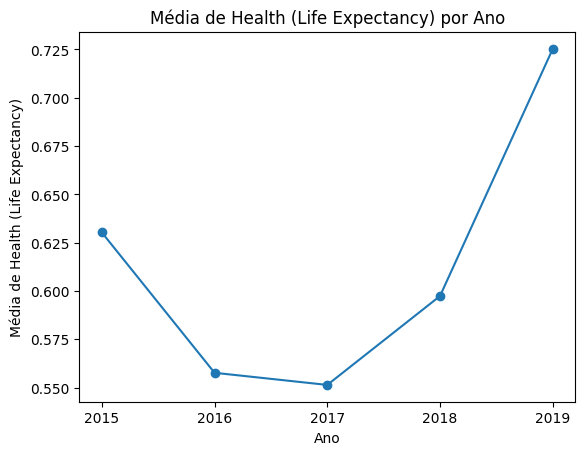

In [203]:
means = []

# Calcular a média de Health (Life Expectancy) para cada DataFrame
for df in dataframes:
    mean_health = df['Health (Life Expectancy)'].mean()
    means.append(mean_health)

# Criar o gráfico de linha
plt.plot(years, means, marker='o')
plt.title('Média de Health (Life Expectancy) por Ano')
plt.xlabel('Ano')
plt.ylabel('Média de Health (Life Expectancy)')
plt.xticks(years)
plt.show()

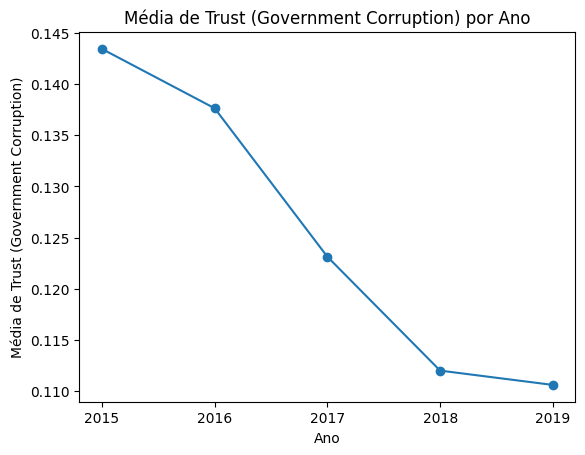

In [204]:
means = []

# Calcular a média de Trust (Government Corruption) para cada DataFrame
for df in dataframes:
    mean_trust = df['Trust (Government Corruption)'].mean()
    means.append(mean_trust)

# Criar o gráfico de linha
plt.plot(years, means, marker='o')
plt.title('Média de Trust (Government Corruption) por Ano')
plt.xlabel('Ano')
plt.ylabel('Média de Trust (Government Corruption)')
plt.xticks(years)
plt.show()

# Explorando Agrupamentos

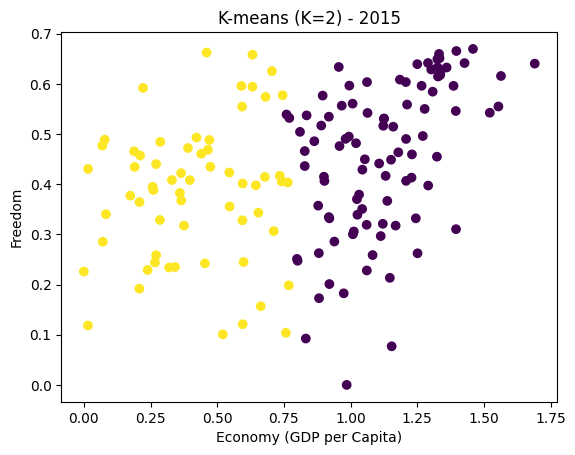

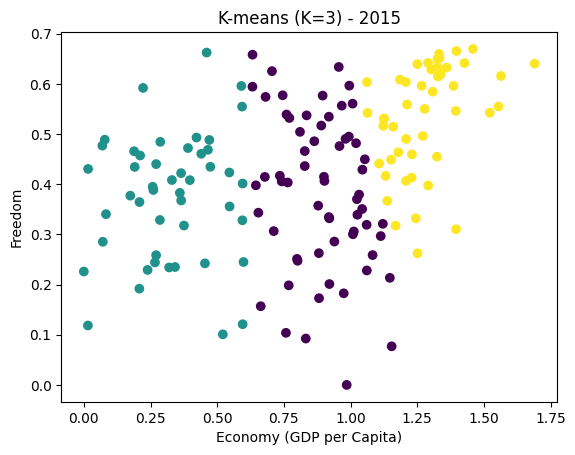

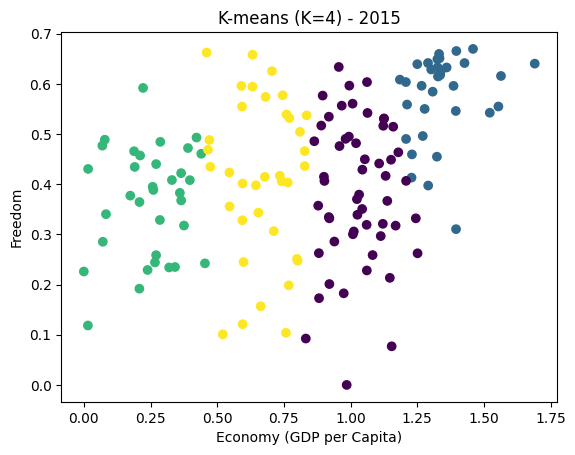

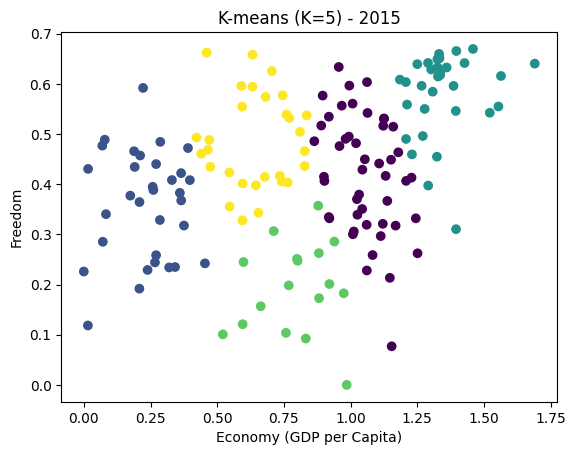

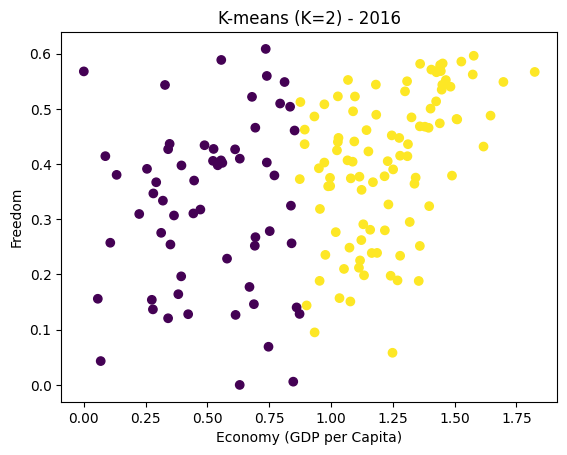

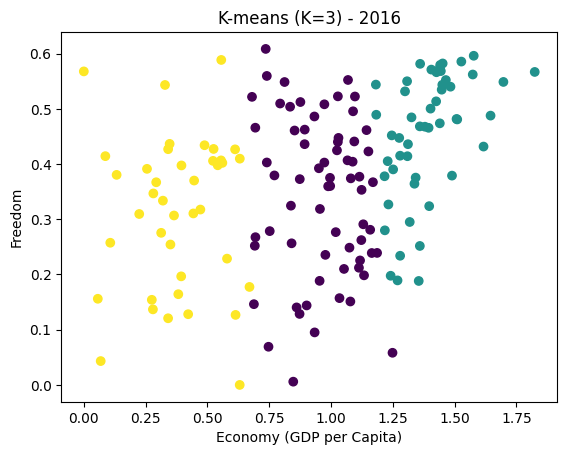

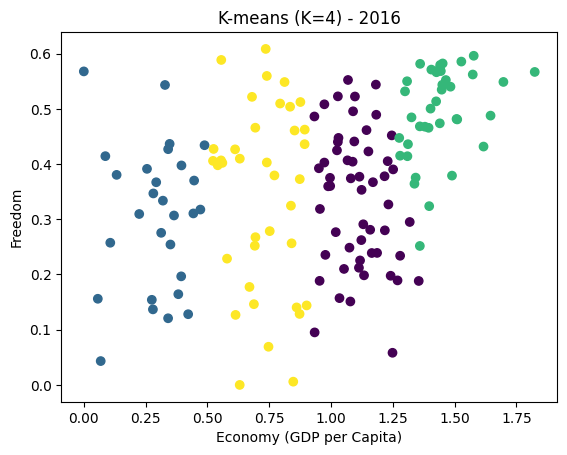

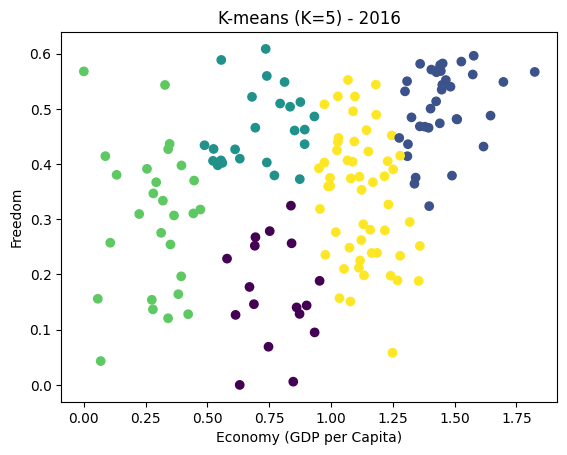

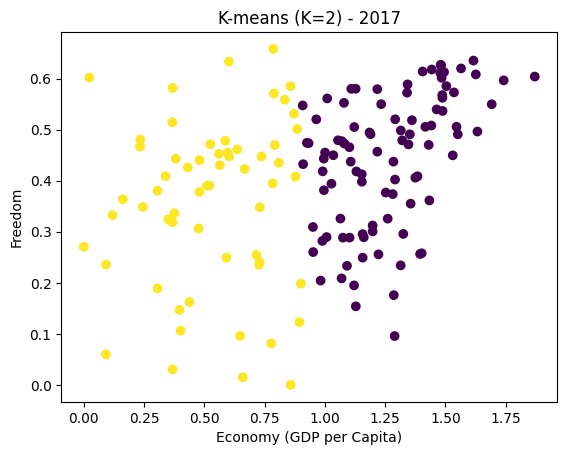

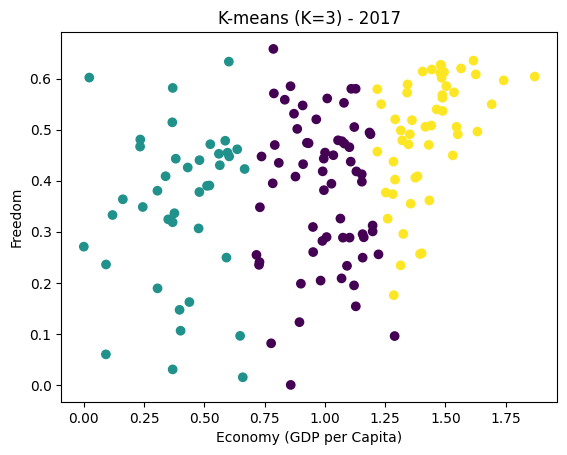

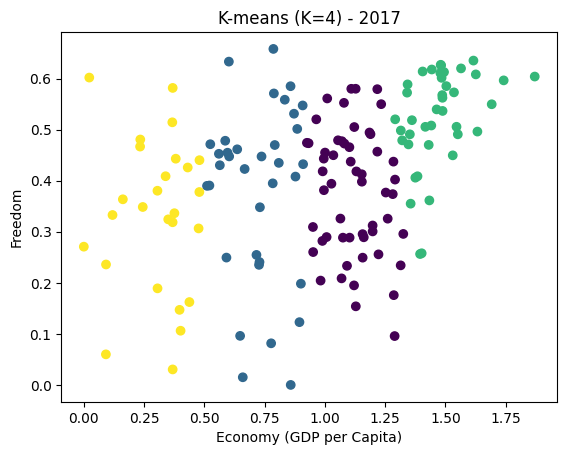

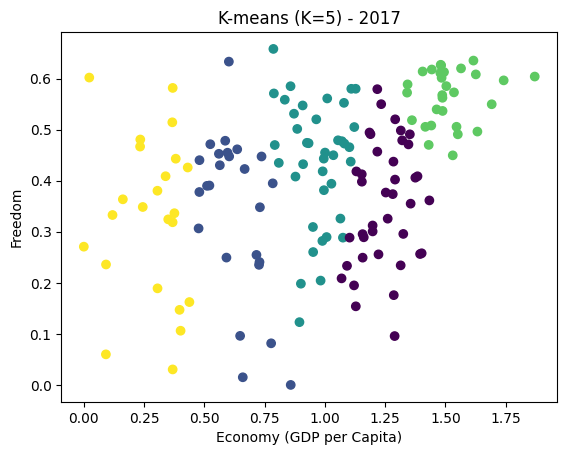

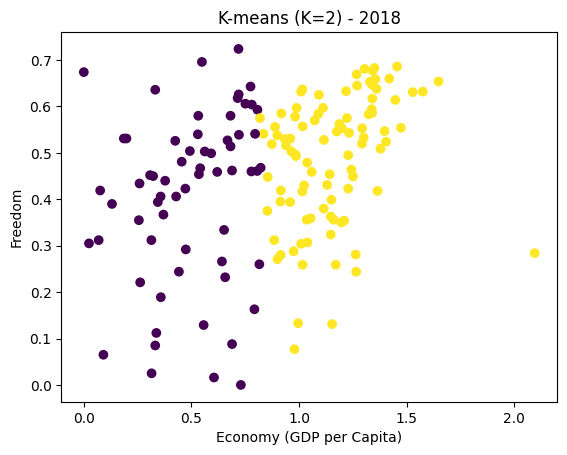

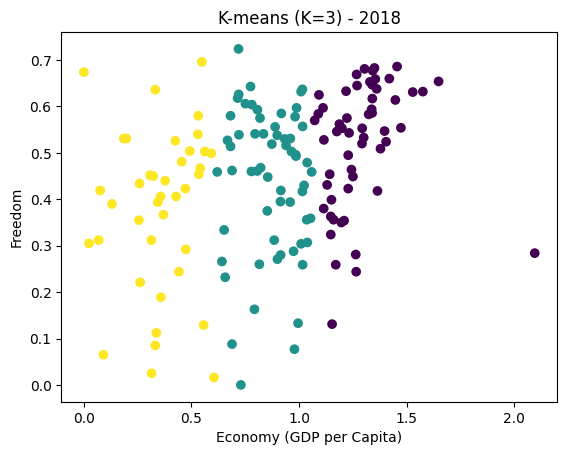

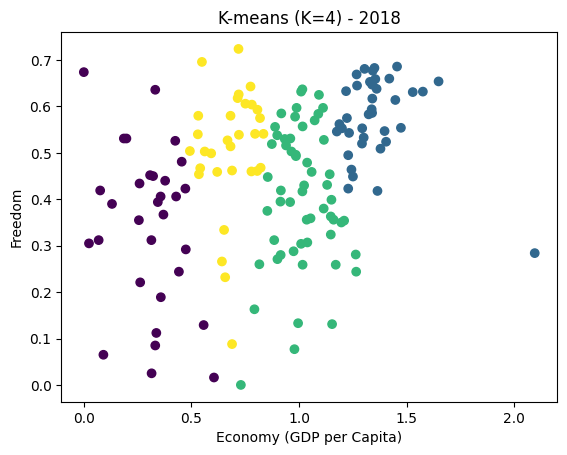

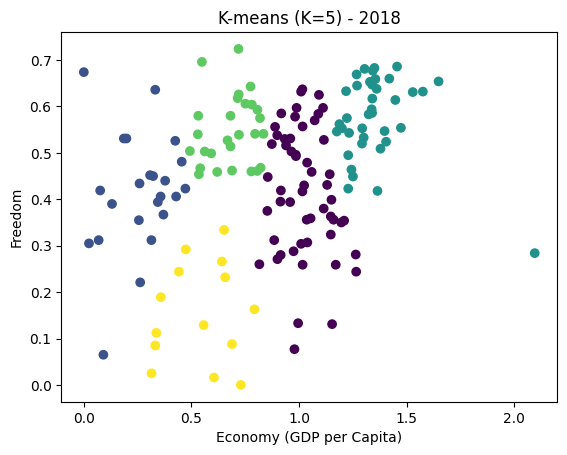

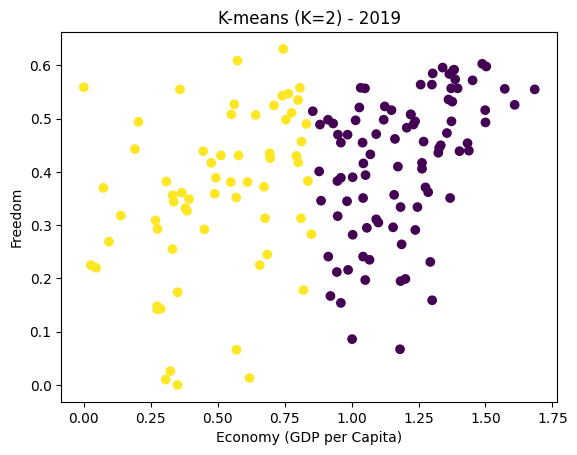

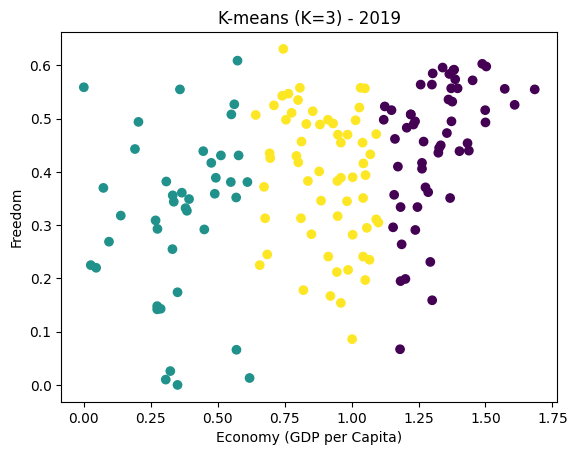

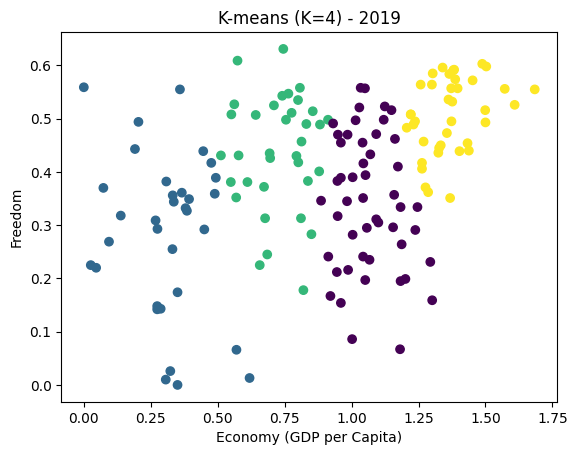

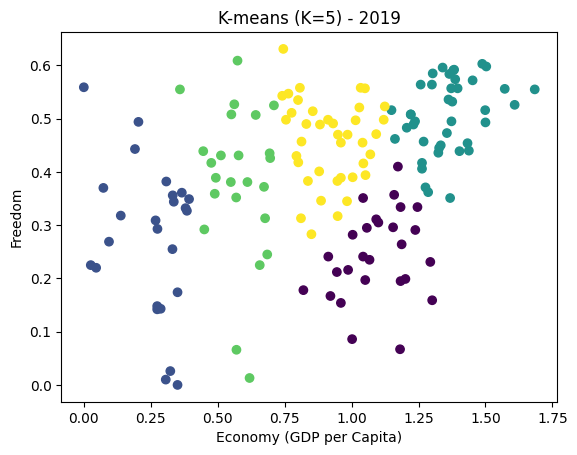

In [207]:
columns = ['Economy (GDP per Capita)', 'Freedom']
k_values = [2, 3, 4, 5]


for i, df in enumerate(dataframes):
    for k in k_values:

        features = df[columns]

        kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)

        kmeans.fit(features)

        labels = kmeans.labels_

        # Visualizar os resultados
        plt.scatter(features['Economy (GDP per Capita)'], features['Freedom'], c=labels)
        plt.xlabel('Economy (GDP per Capita)')
        plt.ylabel('Freedom')
        plt.title(f'K-means (K={k}) - {i+2015}')
        plt.show()

# Relatório

**Título**: [Análise do grau de felicidade mundial entre 2015 e 2019](https://www.kaggle.com/datasets/unsdsn/world-happiness)


**Integrante**: André Victor Mestre Pires Ferreira


**Dados usados**:
as variáveis GDP per Capita (PIB), Family(familia), Life Expectancy(expectativa de vida), Freedom(liberdade), Generosity(generosidade), Trust Government Corruption(confiança no governo) descrevem o grau em que esses fatores contribuem na avaliação da felicidade em cada país.

**Pré-processamento**:
O tratamento dado as variáveis foi de remoção de colunas que não seriam usadas e renomeação de colunas com nomes diferentes entre os datasets. ex: 'Score' 'Happiness Score'.

**Perguntas**:

* (1°) O a média de felicidade mundial aumentou de 2015 à 2019 ?
* (2°) Países mais generosos tem uma população mais feliz ?
* (3°) Quais os países mais e menos felizes durante 2015 e 2019?
* (4°) uma população que vive mais é mais feliz ?

# Respostas:

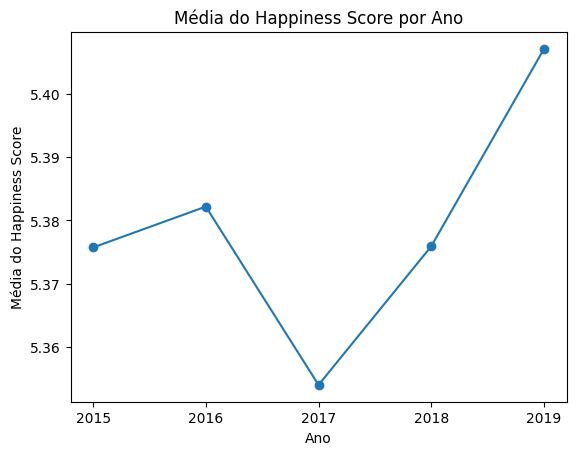

In [213]:
# (1)
# Através de um gráfico de linhas e analisando as médias através de um gráfico de linhas é notável que houveram
# aumentos e decrementos em relação a felicdade mundial. Entretanto, após 2017 até a ultima pesquisa o mundo
# esteve mais feliz.
means = []

for df in dataframes:
    mean_score = df['Happiness Score'].mean()
    means.append(mean_score)

plt.plot(years, means, marker='o')
plt.title('Média do Happiness Score por Ano')
plt.xlabel('Ano')
plt.ylabel('Média do Happiness Score')
plt.xticks(years)
plt.show()

Ano 2015:


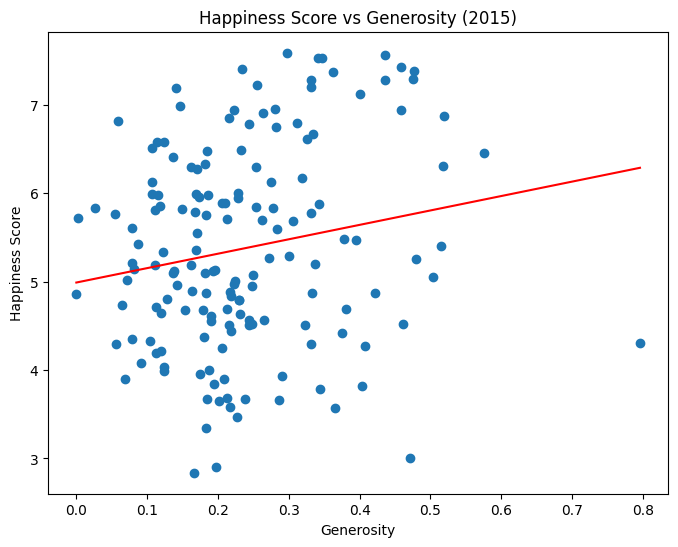

Ano 2016:


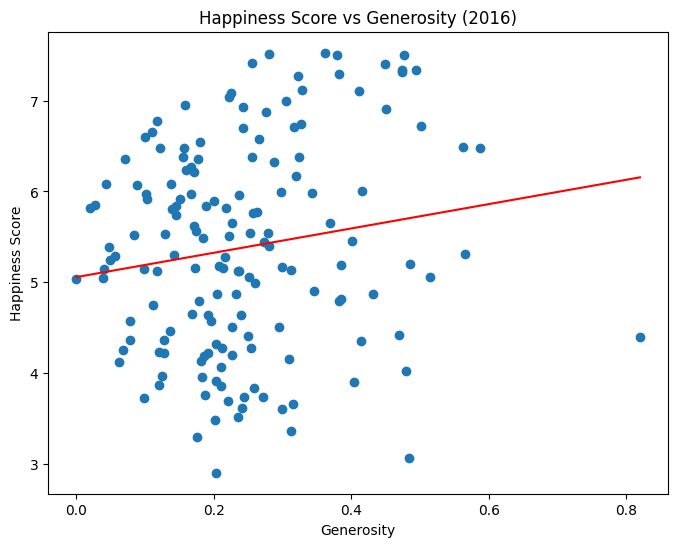

Ano 2017:


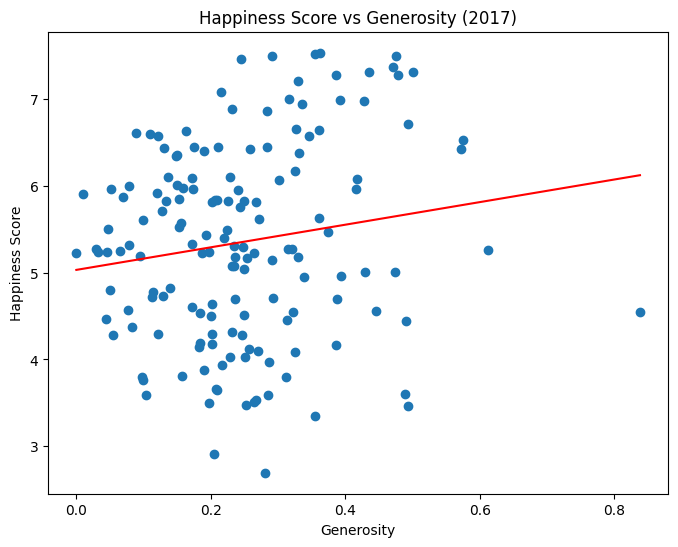

Ano 2018:


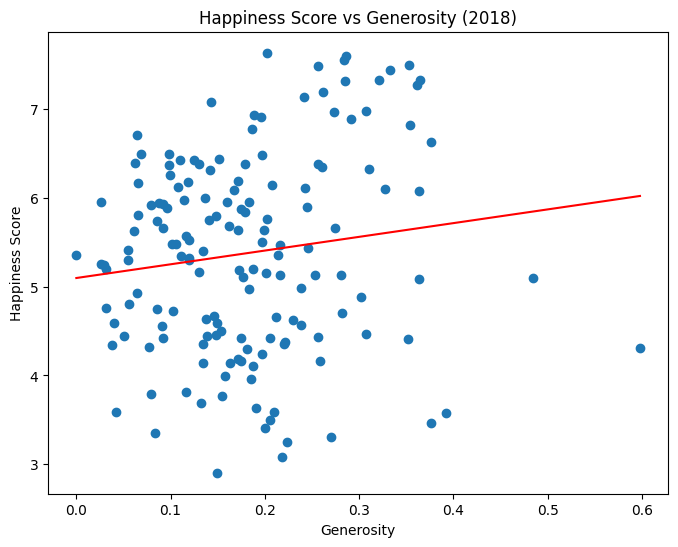

Ano 2019:


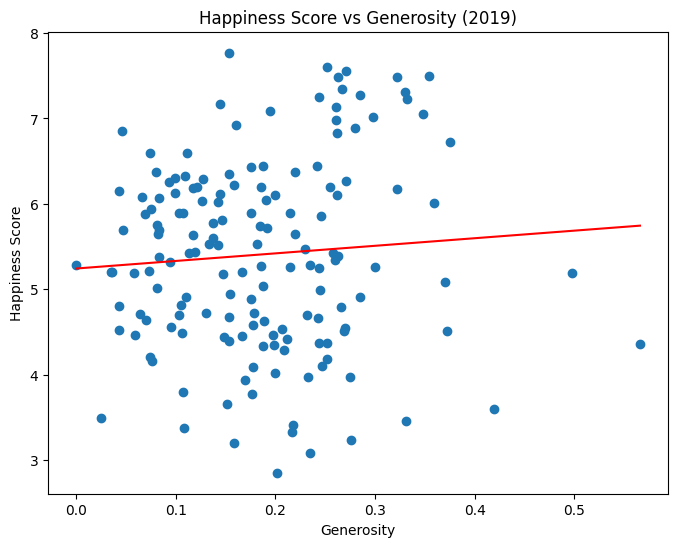

In [8]:
# (2)
# Através de um gráfico de disperção e feita uma tentativa de correlação, nota-se que não há correlação
# entre populações generosas e felizes
for i, df in enumerate(dataframes):
    print(f"Ano {years[i]}:")

    x = df["Generosity"]
    y = df["Happiness Score"]

    coefficients = np.polyfit(x, y, 1)
    poly = np.poly1d(coefficients)
    trendline = np.linspace(x.min(), x.max(), len(x))

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y)
    plt.plot(trendline, poly(trendline), color='r')
    plt.title(f"Happiness Score vs Generosity ({years[i]})")
    plt.xlabel("Generosity")
    plt.ylabel("Happiness Score")
    plt.show()

In [238]:
# (3)
# Agrupa-se paises e seus respectivos happiness score, tira a média de do score de todos os anos
# estando os dados em ordem, usa .head(5) para os 5 mais felizes e .tail(5) para o 5 menos felizes

df_combined = pd.concat(dataframes)

df_mean_happiness = df_combined.groupby('Country')['Happiness Score'].mean()
df_mean_happiness = df_mean_happiness.sort_values(ascending=False)
print("Mais felizes:")
print(df_mean_happiness.head(5).to_string())
print("\nMenos felizes:")
print(df_mean_happiness.tail(5).to_string())

Mais felizes:
Country
Denmark        7.5460
Norway         7.5410
Finland        7.5378
Switzerland    7.5114
Iceland        7.5110

Menos felizes:
Country
Rwanda                      3.43860
South Sudan                 3.38250
Syria                       3.29220
Central African Republic    3.13425
Burundi                     3.07900


Ano 2015:


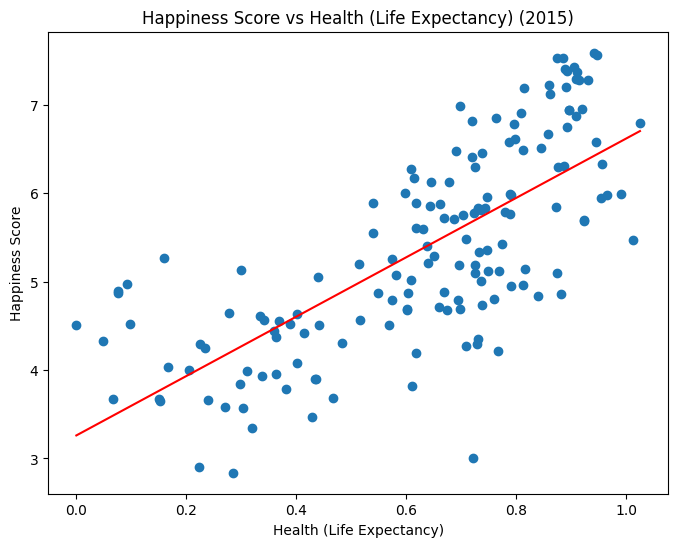

Ano 2016:


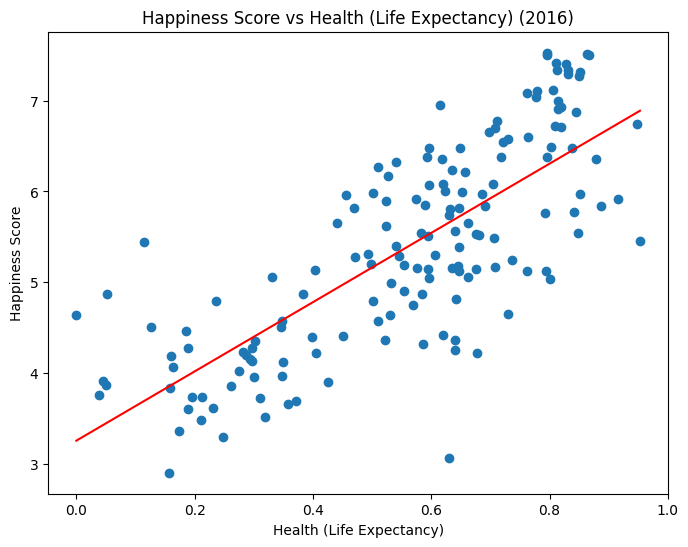

Ano 2017:


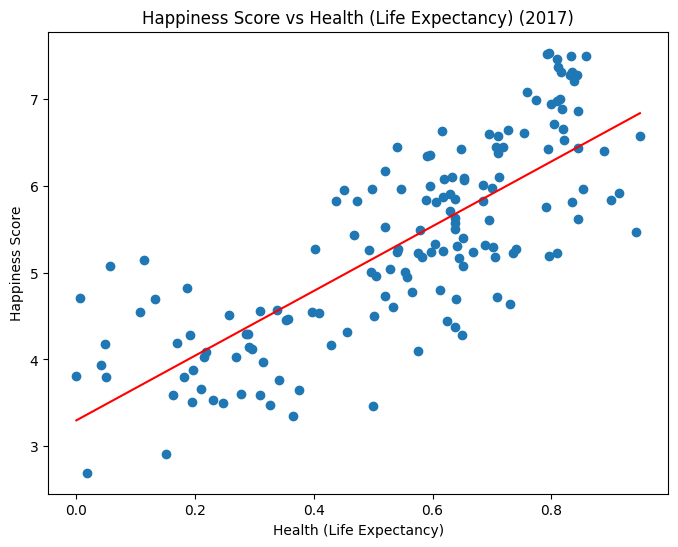

Ano 2018:


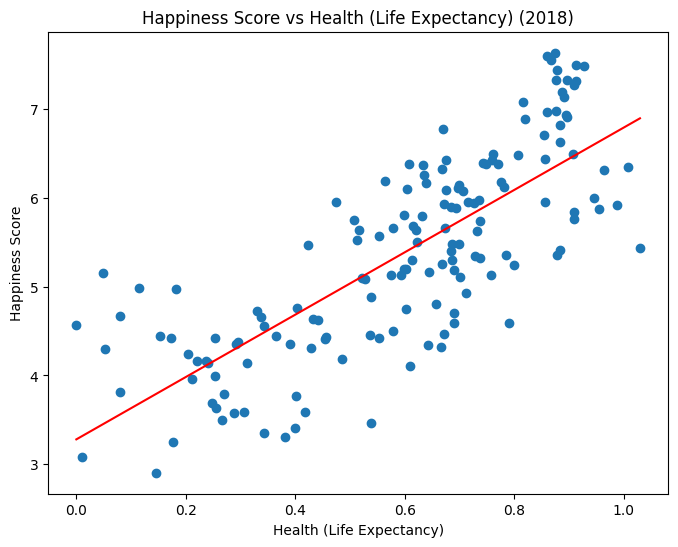

Ano 2019:


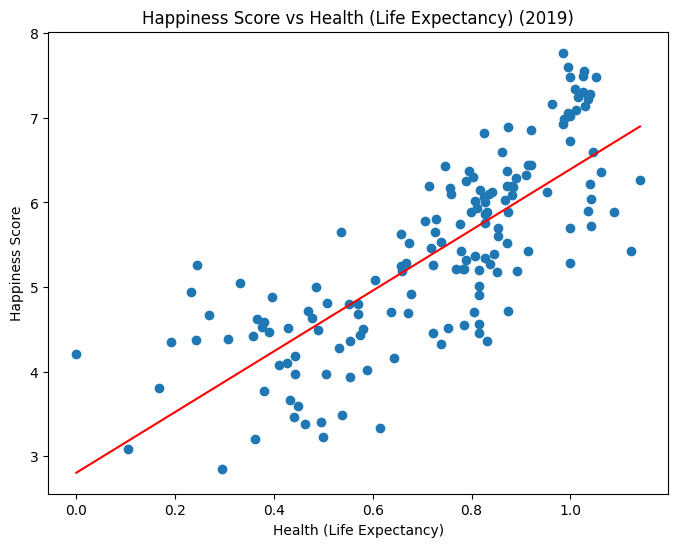

In [10]:
# (4)
# analisando as variáveis happiness score e health é perceptível uma correlação positiva
# média, ou seja, nos países onde se vive mais a população é mais feliz
for i, df in enumerate(dataframes):
    print(f"Ano {years[i]}:")

    x = df["Health (Life Expectancy)"]
    y = df["Happiness Score"]

    coefficients = np.polyfit(x, y, 1)
    poly = np.poly1d(coefficients)
    trendline = np.linspace(x.min(), x.max(), len(x))

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y)
    plt.plot(trendline, poly(trendline), color='r')
    plt.title(f"Happiness Score vs Health (Life Expectancy) ({years[i]})")
    plt.xlabel("Health (Life Expectancy)")
    plt.ylabel("Happiness Score")
    plt.show()

 # Conclusão:
 
 
 Os trabalho mostra variáveis que influênciam no que pode ser entendido como felcidade/satisfação de uma população a respeito de seu país, algumas variáveis como espectativa de vida(Health (Life Expectancy)) e PIB(GDP per Capita) tem maior influência do que variáveis como liberdade, generosidade e confiança no governo. Uma das limitações desse trabalho é uma certa falta de clareza a respeito da medida de certas variáveis, por exemplo, generosidade. Como melhoria, eu vejo que adicionar à análise pontos como Religiosidade, Saúde, Segurança melhoraria muito o entendimento dessa questão.